In [1]:
import numpy as np
import pandas as pd
import string
import spacy
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud

In [2]:
df=pd.read_csv('C:\\Users\\NITESH\\Downloads\\hotelreview.csv',encoding='latin-1')

In [3]:
df.head()

Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5

In [4]:
df.describe()

Rating
count  20491.000000
mean       3.952223
std        1.233030
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000

In [5]:
df.shape

(20491, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [7]:
df.columns

Index(['Review', 'Rating'], dtype='object')

In [8]:
df.isnull().sum()

Review    0
Rating    0
dtype: int64

# EDA
## pre processing of data(expanding contraction)

In [9]:
import re

In [10]:
def remove_special_characters(text):
    pattern = r'[^a-zA-z0-9]' 
    return re.sub(pattern, ' ', text)

In [11]:
df['Review'] = df.apply(lambda x: remove_special_characters(x['Review']), axis = 1)

In [12]:
df['Review']

0        nice hotel expensive parking got good deal sta...
1        ok nothing special charge diamond member hilto...
2        nice rooms not 4  experience hotel monaco seat...
3        unique  great stay  wonderful time hotel monac...
4        great stay great stay  went seahawk game aweso...
                               ...                        
20486    best kept secret 3rd time staying charm  not 5...
20487    great location price view hotel great quick pl...
20488    ok just looks nice modern outside  desk staff ...
20489    hotel theft ruined vacation hotel opened sept ...
20490    people talking  ca n t believe excellent ratin...
Name: Review, Length: 20491, dtype: object

In [13]:
import contractions

In [14]:
df['no_contract'] = df['Review'].apply(lambda x: [contractions.fix(word) for word in x.split()])

In [15]:
df['expanded_text'] = [' '.join(map(str, l)) for l in df['no_contract']]

In [16]:
df.head()

Review  Rating  \
0  nice hotel expensive parking got good deal sta...       4   
1  ok nothing special charge diamond member hilto...       2   
2  nice rooms not 4  experience hotel monaco seat...       3   
3  unique  great stay  wonderful time hotel monac...       5   
4  great stay great stay  went seahawk game aweso...       5   

                                         no_contract  \
0  [nice, hotel, expensive, parking, got, good, d...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, rooms, not, 4, experience, hotel, monac...   
3  [unique, great, stay, wonderful, time, hotel, ...   
4  [great, stay, great, stay, went, seahawk, game...   

                                       expanded_text  
0  nice hotel expensive parking got good deal sta...  
1  ok nothing special charge diamond member hilto...  
2  nice rooms not 4 experience hotel monaco seatt...  
3  unique great stay wonderful time hotel monaco ...  
4  great stay great stay went seahawk game awesom...

# Removing Punctuations

In [17]:
df['no_punc'] =df['expanded_text'].str.replace('[^\w\s]','')

C:\Users\NITESH\AppData\Local\Temp/ipykernel_21104/4261881410.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['no_punc'] =df['expanded_text'].str.replace('[^\w\s]','')


In [18]:
df.head()

Review  Rating  \
0  nice hotel expensive parking got good deal sta...       4   
1  ok nothing special charge diamond member hilto...       2   
2  nice rooms not 4  experience hotel monaco seat...       3   
3  unique  great stay  wonderful time hotel monac...       5   
4  great stay great stay  went seahawk game aweso...       5   

                                         no_contract  \
0  [nice, hotel, expensive, parking, got, good, d...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, rooms, not, 4, experience, hotel, monac...   
3  [unique, great, stay, wonderful, time, hotel, ...   
4  [great, stay, great, stay, went, seahawk, game...   

                                       expanded_text  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4 experience hotel monaco seatt...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                             no_punc  
0  nice hotel expensive parking got good deal sta...  
1  ok nothing special charge diamond member hilto...  
2  nice rooms not 4 experience hotel monaco seatt...  
3  unique great stay wonderful time hotel monaco ...  
4  great stay great stay went seahawk game awesom...

# Tokenization

In [19]:
import nltk

In [20]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NITESH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\NITESH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NITESH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
from nltk.tokenize import word_tokenize

In [22]:
df['tokenized'] = df['no_punc'].apply(word_tokenize)
df.head()

Review  Rating  \
0  nice hotel expensive parking got good deal sta...       4   
1  ok nothing special charge diamond member hilto...       2   
2  nice rooms not 4  experience hotel monaco seat...       3   
3  unique  great stay  wonderful time hotel monac...       5   
4  great stay great stay  went seahawk game aweso...       5   

                                         no_contract  \
0  [nice, hotel, expensive, parking, got, good, d...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, rooms, not, 4, experience, hotel, monac...   
3  [unique, great, stay, wonderful, time, hotel, ...   
4  [great, stay, great, stay, went, seahawk, game...   

                                       expanded_text  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4 experience hotel monaco seatt...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                             no_punc  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4 experience hotel monaco seatt...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                           tokenized  
0  [nice, hotel, expensive, parking, got, good, d...  
1  [ok, nothing, special, charge, diamond, member...  
2  [nice, rooms, not, 4, experience, hotel, monac...  
3  [unique, great, stay, wonderful, time, hotel, ...  
4  [great, stay, great, stay, went, seahawk, game...

# Converting all the uppercase Characters into Lowercase

In [23]:
df['lower'] = df['tokenized'].apply(lambda x: [word.lower() for word in x])
df.head()

Review  Rating  \
0  nice hotel expensive parking got good deal sta...       4   
1  ok nothing special charge diamond member hilto...       2   
2  nice rooms not 4  experience hotel monaco seat...       3   
3  unique  great stay  wonderful time hotel monac...       5   
4  great stay great stay  went seahawk game aweso...       5   

                                         no_contract  \
0  [nice, hotel, expensive, parking, got, good, d...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, rooms, not, 4, experience, hotel, monac...   
3  [unique, great, stay, wonderful, time, hotel, ...   
4  [great, stay, great, stay, went, seahawk, game...   

                                       expanded_text  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4 experience hotel monaco seatt...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                             no_punc  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4 experience hotel monaco seatt...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                           tokenized  \
0  [nice, hotel, expensive, parking, got, good, d...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, rooms, not, 4, experience, hotel, monac...   
3  [unique, great, stay, wonderful, time, hotel, ...   
4  [great, stay, great, stay, went, seahawk, game...   

                                               lower  
0  [nice, hotel, expensive, parking, got, good, d...  
1  [ok, nothing, special, charge, diamond, member...  
2  [nice, rooms, not, 4, experience, hotel, monac...  
3  [unique, great, stay, wonderful, time, hotel, ...  
4  [great, stay, great, stay, went, seahawk, game...

# Finding Number of stopwords

In [24]:
from nltk.corpus import stopwords, wordnet

In [25]:
stop = stopwords.words('english')

In [26]:
df['stopwords'] = df['expanded_text'].apply(lambda x: len([x for x in x.split() if x in stop]))

In [27]:
df.head()

Review  Rating  \
0  nice hotel expensive parking got good deal sta...       4   
1  ok nothing special charge diamond member hilto...       2   
2  nice rooms not 4  experience hotel monaco seat...       3   
3  unique  great stay  wonderful time hotel monac...       5   
4  great stay great stay  went seahawk game aweso...       5   

                                         no_contract  \
0  [nice, hotel, expensive, parking, got, good, d...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, rooms, not, 4, experience, hotel, monac...   
3  [unique, great, stay, wonderful, time, hotel, ...   
4  [great, stay, great, stay, went, seahawk, game...   

                                       expanded_text  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4 experience hotel monaco seatt...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                             no_punc  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4 experience hotel monaco seatt...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                           tokenized  \
0  [nice, hotel, expensive, parking, got, good, d...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, rooms, not, 4, experience, hotel, monac...   
3  [unique, great, stay, wonderful, time, hotel, ...   
4  [great, stay, great, stay, went, seahawk, game...   

                                               lower  stopwords  
0  [nice, hotel, expensive, parking, got, good, d...          6  
1  [ok, nothing, special, charge, diamond, member...         16  
2  [nice, rooms, not, 4, experience, hotel, monac...         15  
3  [unique, great, stay, wonderful, time, hotel, ...          5  
4  [great, stay, great, stay, went, seahawk, game...         17

# Removing Stopwords

In [28]:
stop_words = set(stopwords.words('english'))
df['stopwords_removed'] = df['lower'].apply(lambda x: [word for word in x if word not in stop_words])

In [29]:
df.head()

Review  Rating  \
0  nice hotel expensive parking got good deal sta...       4   
1  ok nothing special charge diamond member hilto...       2   
2  nice rooms not 4  experience hotel monaco seat...       3   
3  unique  great stay  wonderful time hotel monac...       5   
4  great stay great stay  went seahawk game aweso...       5   

                                         no_contract  \
0  [nice, hotel, expensive, parking, got, good, d...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, rooms, not, 4, experience, hotel, monac...   
3  [unique, great, stay, wonderful, time, hotel, ...   
4  [great, stay, great, stay, went, seahawk, game...   

                                       expanded_text  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4 experience hotel monaco seatt...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                             no_punc  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4 experience hotel monaco seatt...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                           tokenized  \
0  [nice, hotel, expensive, parking, got, good, d...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, rooms, not, 4, experience, hotel, monac...   
3  [unique, great, stay, wonderful, time, hotel, ...   
4  [great, stay, great, stay, went, seahawk, game...   

                                               lower  stopwords  \
0  [nice, hotel, expensive, parking, got, good, d...          6   
1  [ok, nothing, special, charge, diamond, member...         16   
2  [nice, rooms, not, 4, experience, hotel, monac...         15   
3  [unique, great, stay, wonderful, time, hotel, ...          5   
4  [great, stay, great, stay, went, seahawk, game...         17   

                                   stopwords_removed  
0  [nice, hotel, expensive, parking, got, good, d...  
1  [ok, nothing, special, charge, diamond, member...  
2  [nice, rooms, 4, experience, hotel, monaco, se...  
3  [unique, great, stay, wonderful, time, hotel, ...  
4  [great, stay, great, stay, went, seahawk, game...

# Number of words-in a single review

In [30]:
df['word_count'] = df['stopwords_removed'].apply(lambda x: len(str(x).split(" ")))

In [31]:
df.head()

Review  Rating  \
0  nice hotel expensive parking got good deal sta...       4   
1  ok nothing special charge diamond member hilto...       2   
2  nice rooms not 4  experience hotel monaco seat...       3   
3  unique  great stay  wonderful time hotel monac...       5   
4  great stay great stay  went seahawk game aweso...       5   

                                         no_contract  \
0  [nice, hotel, expensive, parking, got, good, d...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, rooms, not, 4, experience, hotel, monac...   
3  [unique, great, stay, wonderful, time, hotel, ...   
4  [great, stay, great, stay, went, seahawk, game...   

                                       expanded_text  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4 experience hotel monaco seatt...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                             no_punc  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4 experience hotel monaco seatt...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                           tokenized  \
0  [nice, hotel, expensive, parking, got, good, d...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, rooms, not, 4, experience, hotel, monac...   
3  [unique, great, stay, wonderful, time, hotel, ...   
4  [great, stay, great, stay, went, seahawk, game...   

                                               lower  stopwords  \
0  [nice, hotel, expensive, parking, got, good, d...          6   
1  [ok, nothing, special, charge, diamond, member...         16   
2  [nice, rooms, not, 4, experience, hotel, monac...         15   
3  [unique, great, stay, wonderful, time, hotel, ...          5   
4  [great, stay, great, stay, went, seahawk, game...         17   

                                   stopwords_removed  word_count  
0  [nice, hotel, expensive, parking, got, good, d...          82  
1  [ok, nothing, special, charge, diamond, member...         240  
2  [nice, rooms, 4, experience, hotel, monaco, se...         215  
3  [unique, great, stay, wonderful, time, hotel, ...          87  
4  [great, stay, great, stay, went, seahawk, game...         180

# Number of Characters - in a single review

In [32]:
df['char_count'] = df['no_punc'].str.len()

In [33]:
df.head()

Review  Rating  \
0  nice hotel expensive parking got good deal sta...       4   
1  ok nothing special charge diamond member hilto...       2   
2  nice rooms not 4  experience hotel monaco seat...       3   
3  unique  great stay  wonderful time hotel monac...       5   
4  great stay great stay  went seahawk game aweso...       5   

                                         no_contract  \
0  [nice, hotel, expensive, parking, got, good, d...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, rooms, not, 4, experience, hotel, monac...   
3  [unique, great, stay, wonderful, time, hotel, ...   
4  [great, stay, great, stay, went, seahawk, game...   

                                       expanded_text  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4 experience hotel monaco seatt...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                             no_punc  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4 experience hotel monaco seatt...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                           tokenized  \
0  [nice, hotel, expensive, parking, got, good, d...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, rooms, not, 4, experience, hotel, monac...   
3  [unique, great, stay, wonderful, time, hotel, ...   
4  [great, stay, great, stay, went, seahawk, game...   

                                               lower  stopwords  \
0  [nice, hotel, expensive, parking, got, good, d...          6   
1  [ok, nothing, special, charge, diamond, member...         16   
2  [nice, rooms, not, 4, experience, hotel, monac...         15   
3  [unique, great, stay, wonderful, time, hotel, ...          5   
4  [great, stay, great, stay, went, seahawk, game...         17   

                                   stopwords_removed  word_count  char_count  
0  [nice, hotel, expensive, parking, got, good, d...          82         580  
1  [ok, nothing, special, charge, diamond, member...         240        1667  
2  [nice, rooms, 4, experience, hotel, monaco, se...         215        1406  
3  [unique, great, stay, wonderful, time, hotel, ...          87         585  
4  [great, stay, great, stay, went, seahawk, game...         180        1245

# Wordcloud

In [34]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [35]:
#here we are Define a function to plot our- word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [36]:
# Joining the list into one string/text
df['stp_rem_str'] = [' '.join(map(str, i)) for i in df['stopwords_removed']]
text = ' '.join(df['stp_rem_str'])

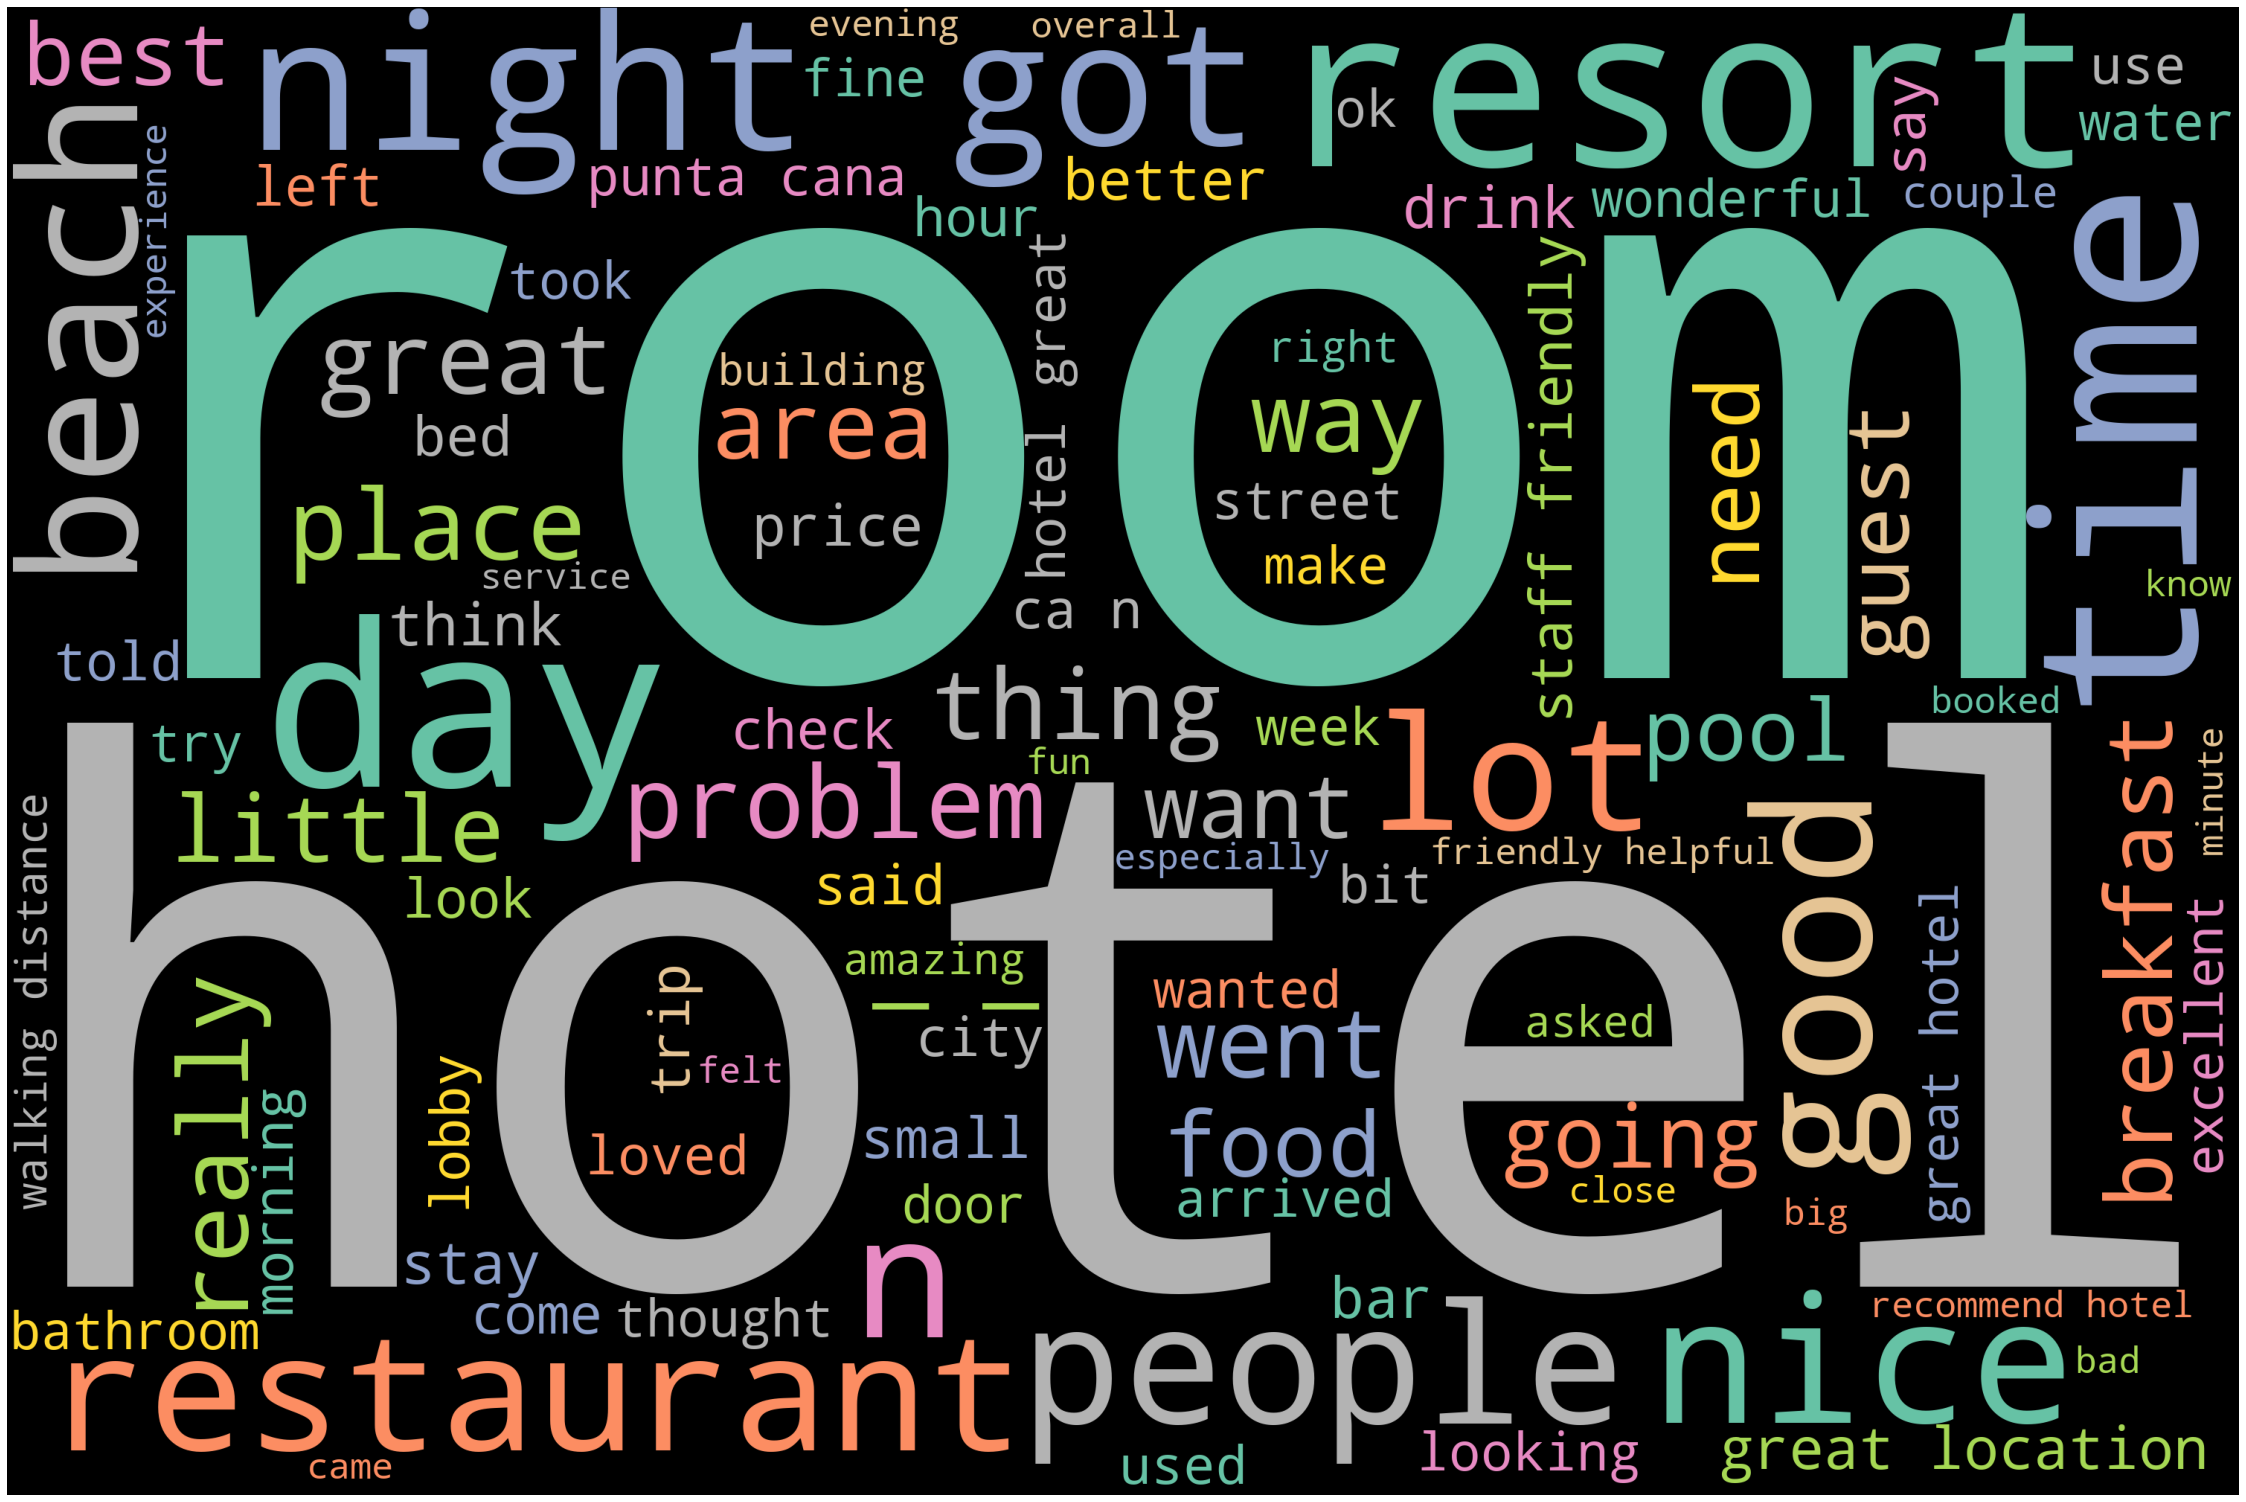

In [37]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

# Stemming

In [38]:
from nltk.stem import PorterStemmer

In [39]:
st = PorterStemmer()
df['stemmi']=df['stp_rem_str'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [40]:
df.head()

Review  Rating  \
0  nice hotel expensive parking got good deal sta...       4   
1  ok nothing special charge diamond member hilto...       2   
2  nice rooms not 4  experience hotel monaco seat...       3   
3  unique  great stay  wonderful time hotel monac...       5   
4  great stay great stay  went seahawk game aweso...       5   

                                         no_contract  \
0  [nice, hotel, expensive, parking, got, good, d...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, rooms, not, 4, experience, hotel, monac...   
3  [unique, great, stay, wonderful, time, hotel, ...   
4  [great, stay, great, stay, went, seahawk, game...   

                                       expanded_text  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4 experience hotel monaco seatt...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                             no_punc  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4 experience hotel monaco seatt...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                           tokenized  \
0  [nice, hotel, expensive, parking, got, good, d...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, rooms, not, 4, experience, hotel, monac...   
3  [unique, great, stay, wonderful, time, hotel, ...   
4  [great, stay, great, stay, went, seahawk, game...   

                                               lower  stopwords  \
0  [nice, hotel, expensive, parking, got, good, d...          6   
1  [ok, nothing, special, charge, diamond, member...         16   
2  [nice, rooms, not, 4, experience, hotel, monac...         15   
3  [unique, great, stay, wonderful, time, hotel, ...          5   
4  [great, stay, great, stay, went, seahawk, game...         17   

                                   stopwords_removed  word_count  char_count  \
0  [nice, hotel, expensive, parking, got, good, d...          82         580   
1  [ok, nothing, special, charge, diamond, member...         240        1667   
2  [nice, rooms, 4, experience, hotel, monaco, se...         215        1406   
3  [unique, great, stay, wonderful, time, hotel, ...          87         585   
4  [great, stay, great, stay, went, seahawk, game...         180        1245   

                                         stp_rem_str  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms 4 experience hotel monaco seattle g...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                              stemmi  
0  nice hotel expens park got good deal stay hote...  
1  ok noth special charg diamond member hilton de...  
2  nice room 4 experi hotel monaco seattl good ho...  
3  uniqu great stay wonder time hotel monaco loca...  
4  great stay great stay went seahawk game awesom...

# Lemmatization

In [41]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
from textblob import Word

In [43]:
#import nltk
#nltk.download('omw-1.4')

In [44]:
df['lemma'] =df['stemmi'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.head()

Review  Rating  \
0  nice hotel expensive parking got good deal sta...       4   
1  ok nothing special charge diamond member hilto...       2   
2  nice rooms not 4  experience hotel monaco seat...       3   
3  unique  great stay  wonderful time hotel monac...       5   
4  great stay great stay  went seahawk game aweso...       5   

                                         no_contract  \
0  [nice, hotel, expensive, parking, got, good, d...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, rooms, not, 4, experience, hotel, monac...   
3  [unique, great, stay, wonderful, time, hotel, ...   
4  [great, stay, great, stay, went, seahawk, game...   

                                       expanded_text  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4 experience hotel monaco seatt...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                             no_punc  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4 experience hotel monaco seatt...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                           tokenized  \
0  [nice, hotel, expensive, parking, got, good, d...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, rooms, not, 4, experience, hotel, monac...   
3  [unique, great, stay, wonderful, time, hotel, ...   
4  [great, stay, great, stay, went, seahawk, game...   

                                               lower  stopwords  \
0  [nice, hotel, expensive, parking, got, good, d...          6   
1  [ok, nothing, special, charge, diamond, member...         16   
2  [nice, rooms, not, 4, experience, hotel, monac...         15   
3  [unique, great, stay, wonderful, time, hotel, ...          5   
4  [great, stay, great, stay, went, seahawk, game...         17   

                                   stopwords_removed  word_count  char_count  \
0  [nice, hotel, expensive, parking, got, good, d...          82         580   
1  [ok, nothing, special, charge, diamond, member...         240        1667   
2  [nice, rooms, 4, experience, hotel, monaco, se...         215        1406   
3  [unique, great, stay, wonderful, time, hotel, ...          87         585   
4  [great, stay, great, stay, went, seahawk, game...         180        1245   

                                         stp_rem_str  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms 4 experience hotel monaco seattle g...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                              stemmi  \
0  nice hotel expens park got good deal stay hote...   
1  ok noth special charg diamond member hilton de...   
2  nice room 4 experi hotel monaco seattl good ho...   
3  uniqu great stay wonder time hotel monaco loca...   
4  great stay great stay went seahawk game awesom...   

                                               lemma  
0  nice hotel expens park got good deal stay hote...  
1  ok noth special charg diamond member hilton de...  
2  nice room 4 experi hotel monaco seattl good ho...  
3  uniqu great stay wonder time hotel monaco loca...  
4  great stay great stay went seahawk game awesom...

In [45]:
df[['stemmi','lemma']]

stemmi  \
0      nice hotel expens park got good deal stay hote...   
1      ok noth special charg diamond member hilton de...   
2      nice room 4 experi hotel monaco seattl good ho...   
3      uniqu great stay wonder time hotel monaco loca...   
4      great stay great stay went seahawk game awesom...   
...                                                  ...   
20486  best kept secret 3rd time stay charm 5 star ca...   
20487  great locat price view hotel great quick place...   
20488  ok look nice modern outsid desk staff n partic...   
20489  hotel theft ruin vacat hotel open sept 17 2007...   
20490  peopl talk ca n believ excel rate hotel n ye p...   

                                                   lemma  
0      nice hotel expens park got good deal stay hote...  
1      ok noth special charg diamond member hilton de...  
2      nice room 4 experi hotel monaco seattl good ho...  
3      uniqu great stay wonder time hotel monaco loca...  
4      great stay great stay went seahawk game awesom...  
...                                                  ...  
20486  best kept secret 3rd time stay charm 5 star ca...  
20487  great locat price view hotel great quick place...  
20488  ok look nice modern outsid desk staff n partic...  
20489  hotel theft ruin vacat hotel open sept 17 2007...  
20490  peopl talk ca n believ excel rate hotel n ye p...  

[20491 rows x 2 columns]

# CLEAN THE DATA
# Creating a function to remove special characters

In [46]:
#import re
def cleantext(text):
    text = re.sub(r"â€™", "", text) # Remove Mentions
    text = re.sub(r"#", "", text) # Remove Hashtags Symbol
    text = re.sub(r"\w*\d\w*", "", text) # Remove numbers
    text = re.sub(r"https?:\/\/\S+", "", text) # Remove The Hyper Link
    text = re.sub(r"______________", "", text) # Remove _____
    
    
    return text

In [47]:
df['cleaned'] = df['lemma'].apply(cleantext)

In [48]:
df.head()

Review  Rating  \
0  nice hotel expensive parking got good deal sta...       4   
1  ok nothing special charge diamond member hilto...       2   
2  nice rooms not 4  experience hotel monaco seat...       3   
3  unique  great stay  wonderful time hotel monac...       5   
4  great stay great stay  went seahawk game aweso...       5   

                                         no_contract  \
0  [nice, hotel, expensive, parking, got, good, d...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, rooms, not, 4, experience, hotel, monac...   
3  [unique, great, stay, wonderful, time, hotel, ...   
4  [great, stay, great, stay, went, seahawk, game...   

                                       expanded_text  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4 experience hotel monaco seatt...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                             no_punc  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4 experience hotel monaco seatt...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                           tokenized  \
0  [nice, hotel, expensive, parking, got, good, d...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, rooms, not, 4, experience, hotel, monac...   
3  [unique, great, stay, wonderful, time, hotel, ...   
4  [great, stay, great, stay, went, seahawk, game...   

                                               lower  stopwords  \
0  [nice, hotel, expensive, parking, got, good, d...          6   
1  [ok, nothing, special, charge, diamond, member...         16   
2  [nice, rooms, not, 4, experience, hotel, monac...         15   
3  [unique, great, stay, wonderful, time, hotel, ...          5   
4  [great, stay, great, stay, went, seahawk, game...         17   

                                   stopwords_removed  word_count  char_count  \
0  [nice, hotel, expensive, parking, got, good, d...          82         580   
1  [ok, nothing, special, charge, diamond, member...         240        1667   
2  [nice, rooms, 4, experience, hotel, monaco, se...         215        1406   
3  [unique, great, stay, wonderful, time, hotel, ...          87         585   
4  [great, stay, great, stay, went, seahawk, game...         180        1245   

                                         stp_rem_str  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms 4 experience hotel monaco seattle g...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                              stemmi  \
0  nice hotel expens park got good deal stay hote...   
1  ok noth special charg diamond member hilton de...   
2  nice room 4 experi hotel monaco seattl good ho...   
3  uniqu great stay wonder time hotel monaco loca...   
4  great stay great stay went seahawk game awesom...   

                                               lemma  \
0  nice hotel expens park got good deal stay hote...   
1  ok noth special charg diamond member hilton de...   
2  nice room 4 experi hotel monaco seattl good ho...   
3  uniqu great stay wonder time hotel monaco loca...   
4  great stay great stay went seahawk game awesom...   

                                             cleaned  
0  nice hotel expens park got good deal stay hote...  
1  ok noth special charg diamond member hilton de...  
2  nice room  experi hotel monaco seattl good hot...  
3  uniqu great stay wonder time hotel monaco loca...  
4  great stay great stay went seahawk game awesom...

# Top 20 most used words

In [49]:
reviews=np.array(df['cleaned'])
s=str(reviews)
token = word_tokenize(s)
print(token)

['[', "'nice", 'hotel', 'expens', 'park', 'got', 'good', 'deal', 'stay', 'hotel', 'anniversari', 'arriv', 'late', 'even', 'took', 'advic', 'previou', 'review', 'valet', 'park', 'check', 'quick', 'easi', 'littl', 'disappoint', 'non', 'exist', 'view', 'room', 'room', 'clean', 'nice', 'size', 'bed', 'comfort', 'woke', 'stiff', 'neck', 'high', 'pillow', 'soundproof', 'like', 'heard', 'music', 'room', 'night', 'morn', 'loud', 'bang', 'door', 'open', 'close', 'hear', 'peopl', 'talk', 'hallway', 'mayb', 'noisi', 'neighbor', 'aveda', 'bath', 'product', 'nice', 'goldfish', 'stay', 'nice', 'touch', 'taken', 'advantag', 'stay', 'longer', 'locat', 'great', 'walk', 'distanc', 'shop', 'overal', 'nice', 'experi', 'pay', 'park', "night'", "'ok", 'noth', 'special', 'charg', 'diamond', 'member', 'hilton', 'decid', 'chain', 'shot', 'anniversari', 'seattl', 'start', 'book', 'suit', 'paid', 'extra', 'websit', 'descript', 'suit', 'bedroom', 'bathroom', 'standard', 'hotel', 'room', 'took', 'print', 'reserv',

# Plotting the frequency of top 20 words

In [50]:
from nltk.probability import FreqDist

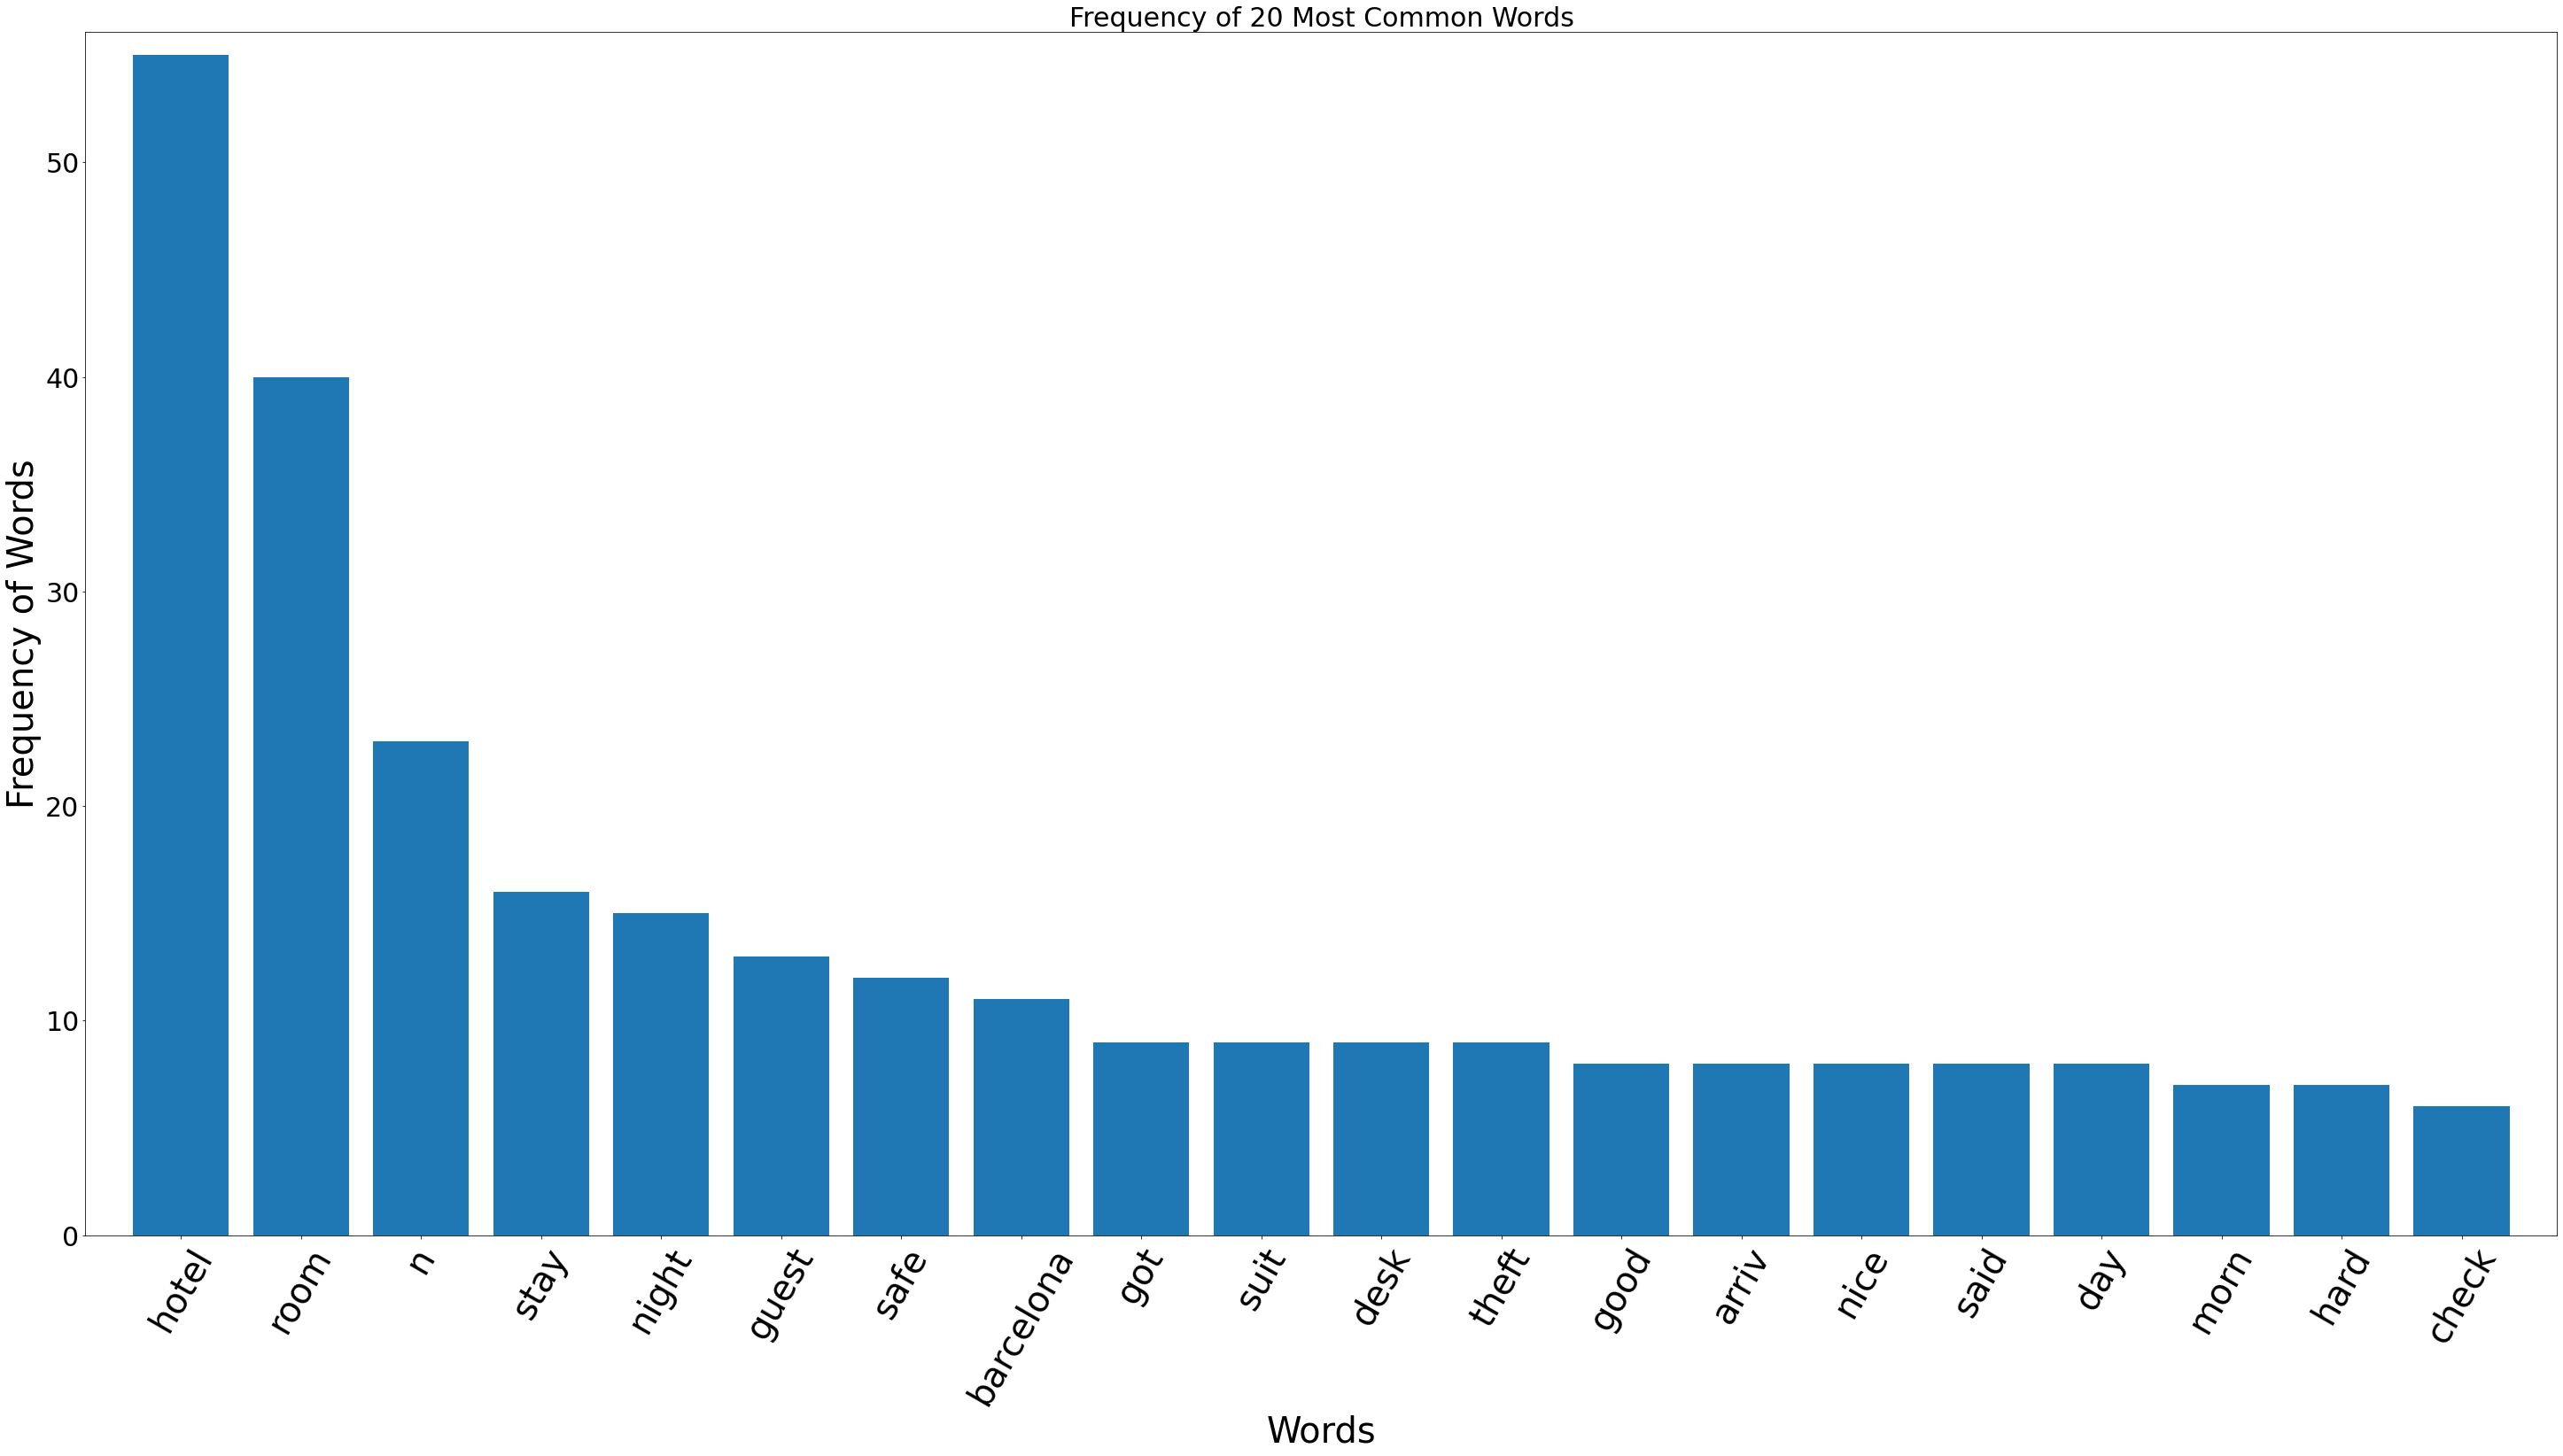

In [51]:
mostcommon_1 = FreqDist(token).most_common(20)
x, y = zip(*mostcommon_1)
plt.figure(figsize=(50,25))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=40)
plt.ylabel('Frequency of Words', fontsize=40)
plt.yticks(fontsize=30)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 20 Most Common Words', fontsize=30)
plt.show()

# Bi-gram

In [52]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [53]:
# top 20 Bi-gram words
from sklearn.feature_extraction.text import CountVectorizer
top2_words = get_top_n2_words(df["cleaned"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head(20)

Bi-gram  Freq
0         stay hotel  2817
1        great locat  2215
2     staff friendli  2179
3         room clean  2143
4         punta cana  1727
5         minut walk  1718
6         hotel stay  1663
7         stay night  1602
8        hotel great  1509
9        great hotel  1505
10      walk distanc  1481
11   recommend hotel  1478
12     friendli help  1475
13        hotel room  1392
14  highli recommend  1375
15       room servic  1349
16       hotel staff  1289
17        place stay  1250
18       hotel locat  1162
19        staff help  1156

# Bi-gram plot

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

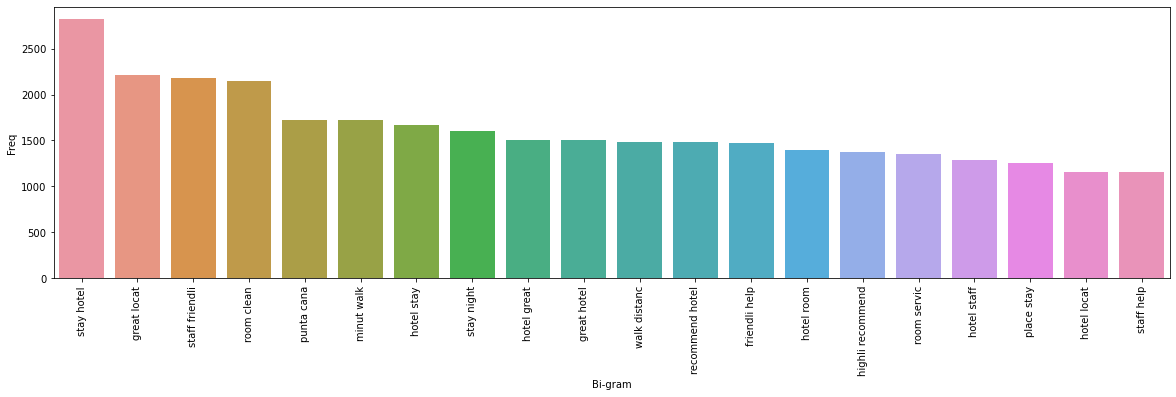

In [55]:
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (20, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"]);
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"]);

# Tri-Gram

In [56]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [57]:
top3_words = get_top_n3_words(df["cleaned"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [58]:
# Top 20 Tri gram words
top3_df.head(20)

Tri-gram  Freq
0      staff friendli help   796
1        hotel great locat   559
2             old san juan   364
3            king size bed   354
4   highli recommend hotel   333
5           flat screen tv   315
6         great place stay   291
7         stay hotel night   275
8          good valu money   233
9        great hotel great   231
10         la cart restaur   226
11    hotel staff friendli   213
12       easi walk distanc   200
13    free internet access   196
14     staff help friendli   186
15        hotel good locat   182
16          non smoke room   182
17        hotel stay hotel   180
18          room good size   179
19         minut walk away   166

# Tri-gram plot

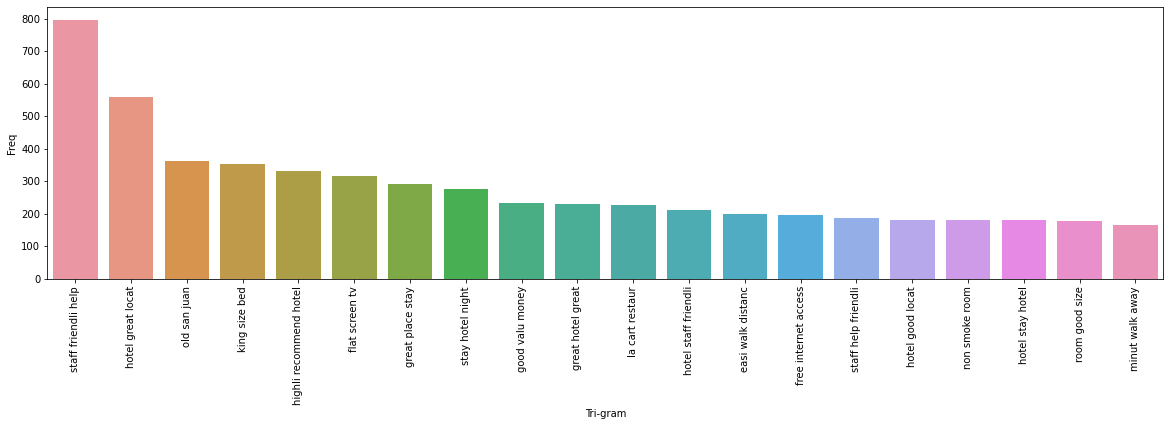

In [59]:
#import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (20, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"]);
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"]);

# Now remove some unwanted words

In [60]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NITESH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\NITESH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NITESH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [61]:
sw_nltk = stopwords.words('english')

In [62]:
sw_nltk.extend(['howev','ever','particularli','includ','end','put','stop','make','find','hotel','trafalgar','excel','would','realli','also','week','deliveriesrefus','lowandbeholdtwo','back','strand','palac','london','go','come'])

In [63]:
df['cleaned_1'] = df['cleaned'].str.split().map(lambda x: [word for word in x if word not in sw_nltk])

In [64]:
df.head()

Review  Rating  \
0  nice hotel expensive parking got good deal sta...       4   
1  ok nothing special charge diamond member hilto...       2   
2  nice rooms not 4  experience hotel monaco seat...       3   
3  unique  great stay  wonderful time hotel monac...       5   
4  great stay great stay  went seahawk game aweso...       5   

                                         no_contract  \
0  [nice, hotel, expensive, parking, got, good, d...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, rooms, not, 4, experience, hotel, monac...   
3  [unique, great, stay, wonderful, time, hotel, ...   
4  [great, stay, great, stay, went, seahawk, game...   

                                       expanded_text  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4 experience hotel monaco seatt...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                             no_punc  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4 experience hotel monaco seatt...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                           tokenized  \
0  [nice, hotel, expensive, parking, got, good, d...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, rooms, not, 4, experience, hotel, monac...   
3  [unique, great, stay, wonderful, time, hotel, ...   
4  [great, stay, great, stay, went, seahawk, game...   

                                               lower  stopwords  \
0  [nice, hotel, expensive, parking, got, good, d...          6   
1  [ok, nothing, special, charge, diamond, member...         16   
2  [nice, rooms, not, 4, experience, hotel, monac...         15   
3  [unique, great, stay, wonderful, time, hotel, ...          5   
4  [great, stay, great, stay, went, seahawk, game...         17   

                                   stopwords_removed  word_count  char_count  \
0  [nice, hotel, expensive, parking, got, good, d...          82         580   
1  [ok, nothing, special, charge, diamond, member...         240        1667   
2  [nice, rooms, 4, experience, hotel, monaco, se...         215        1406   
3  [unique, great, stay, wonderful, time, hotel, ...          87         585   
4  [great, stay, great, stay, went, seahawk, game...         180        1245   

                                         stp_rem_str  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms 4 experience hotel monaco seattle g...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                              stemmi  \
0  nice hotel expens park got good deal stay hote...   
1  ok noth special charg diamond member hilton de...   
2  nice room 4 experi hotel monaco seattl good ho...   
3  uniqu great stay wonder time hotel monaco loca...   
4  great stay great stay went seahawk game awesom...   

                                               lemma  \
0  nice hotel expens park got good deal stay hote...   
1  ok noth special charg diamond member hilton de...   
2  nice room 4 experi hotel monaco seattl good ho...   
3  uniqu great stay wonder time hotel monaco loca...   
4  great stay great stay went seahawk game awesom...   

                                             cleaned  \
0  nice hotel expens park got good deal stay hote...   
1  ok noth special charg diamond member hilton de...   
2  nice room  experi hotel monaco seattl good hot...   
3  uniqu great stay wonder time hotel monaco loca...   
4  great stay great stay went seahawk game awesom...   

                                           cleaned_1  
0  [nice, expens, park, go

In [65]:
df['cleaned_1']=df['cleaned_1'].apply(' '.join)

In [66]:
df['cleaned_1']

0        nice expens park got good deal stay anniversar...
1        ok noth special charg diamond member hilton de...
2        nice room experi monaco seattl good n level po...
3        uniqu great stay wonder time monaco locat shor...
4        great stay great stay went seahawk game awesom...
                               ...                        
20486    best kept secret time stay charm star ca n bea...
20487    great locat price view great quick place sight...
20488    ok look nice modern outsid desk staff n friend...
20489    theft ruin vacat open sept guest happi stumbl ...
20490    peopl talk ca n believ rate n ye patricia extr...
Name: cleaned_1, Length: 20491, dtype: object

# Building a new wordcloud after removing unwanted words

In [67]:
#Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [68]:
ext = ' '.join(df['cleaned_1'])

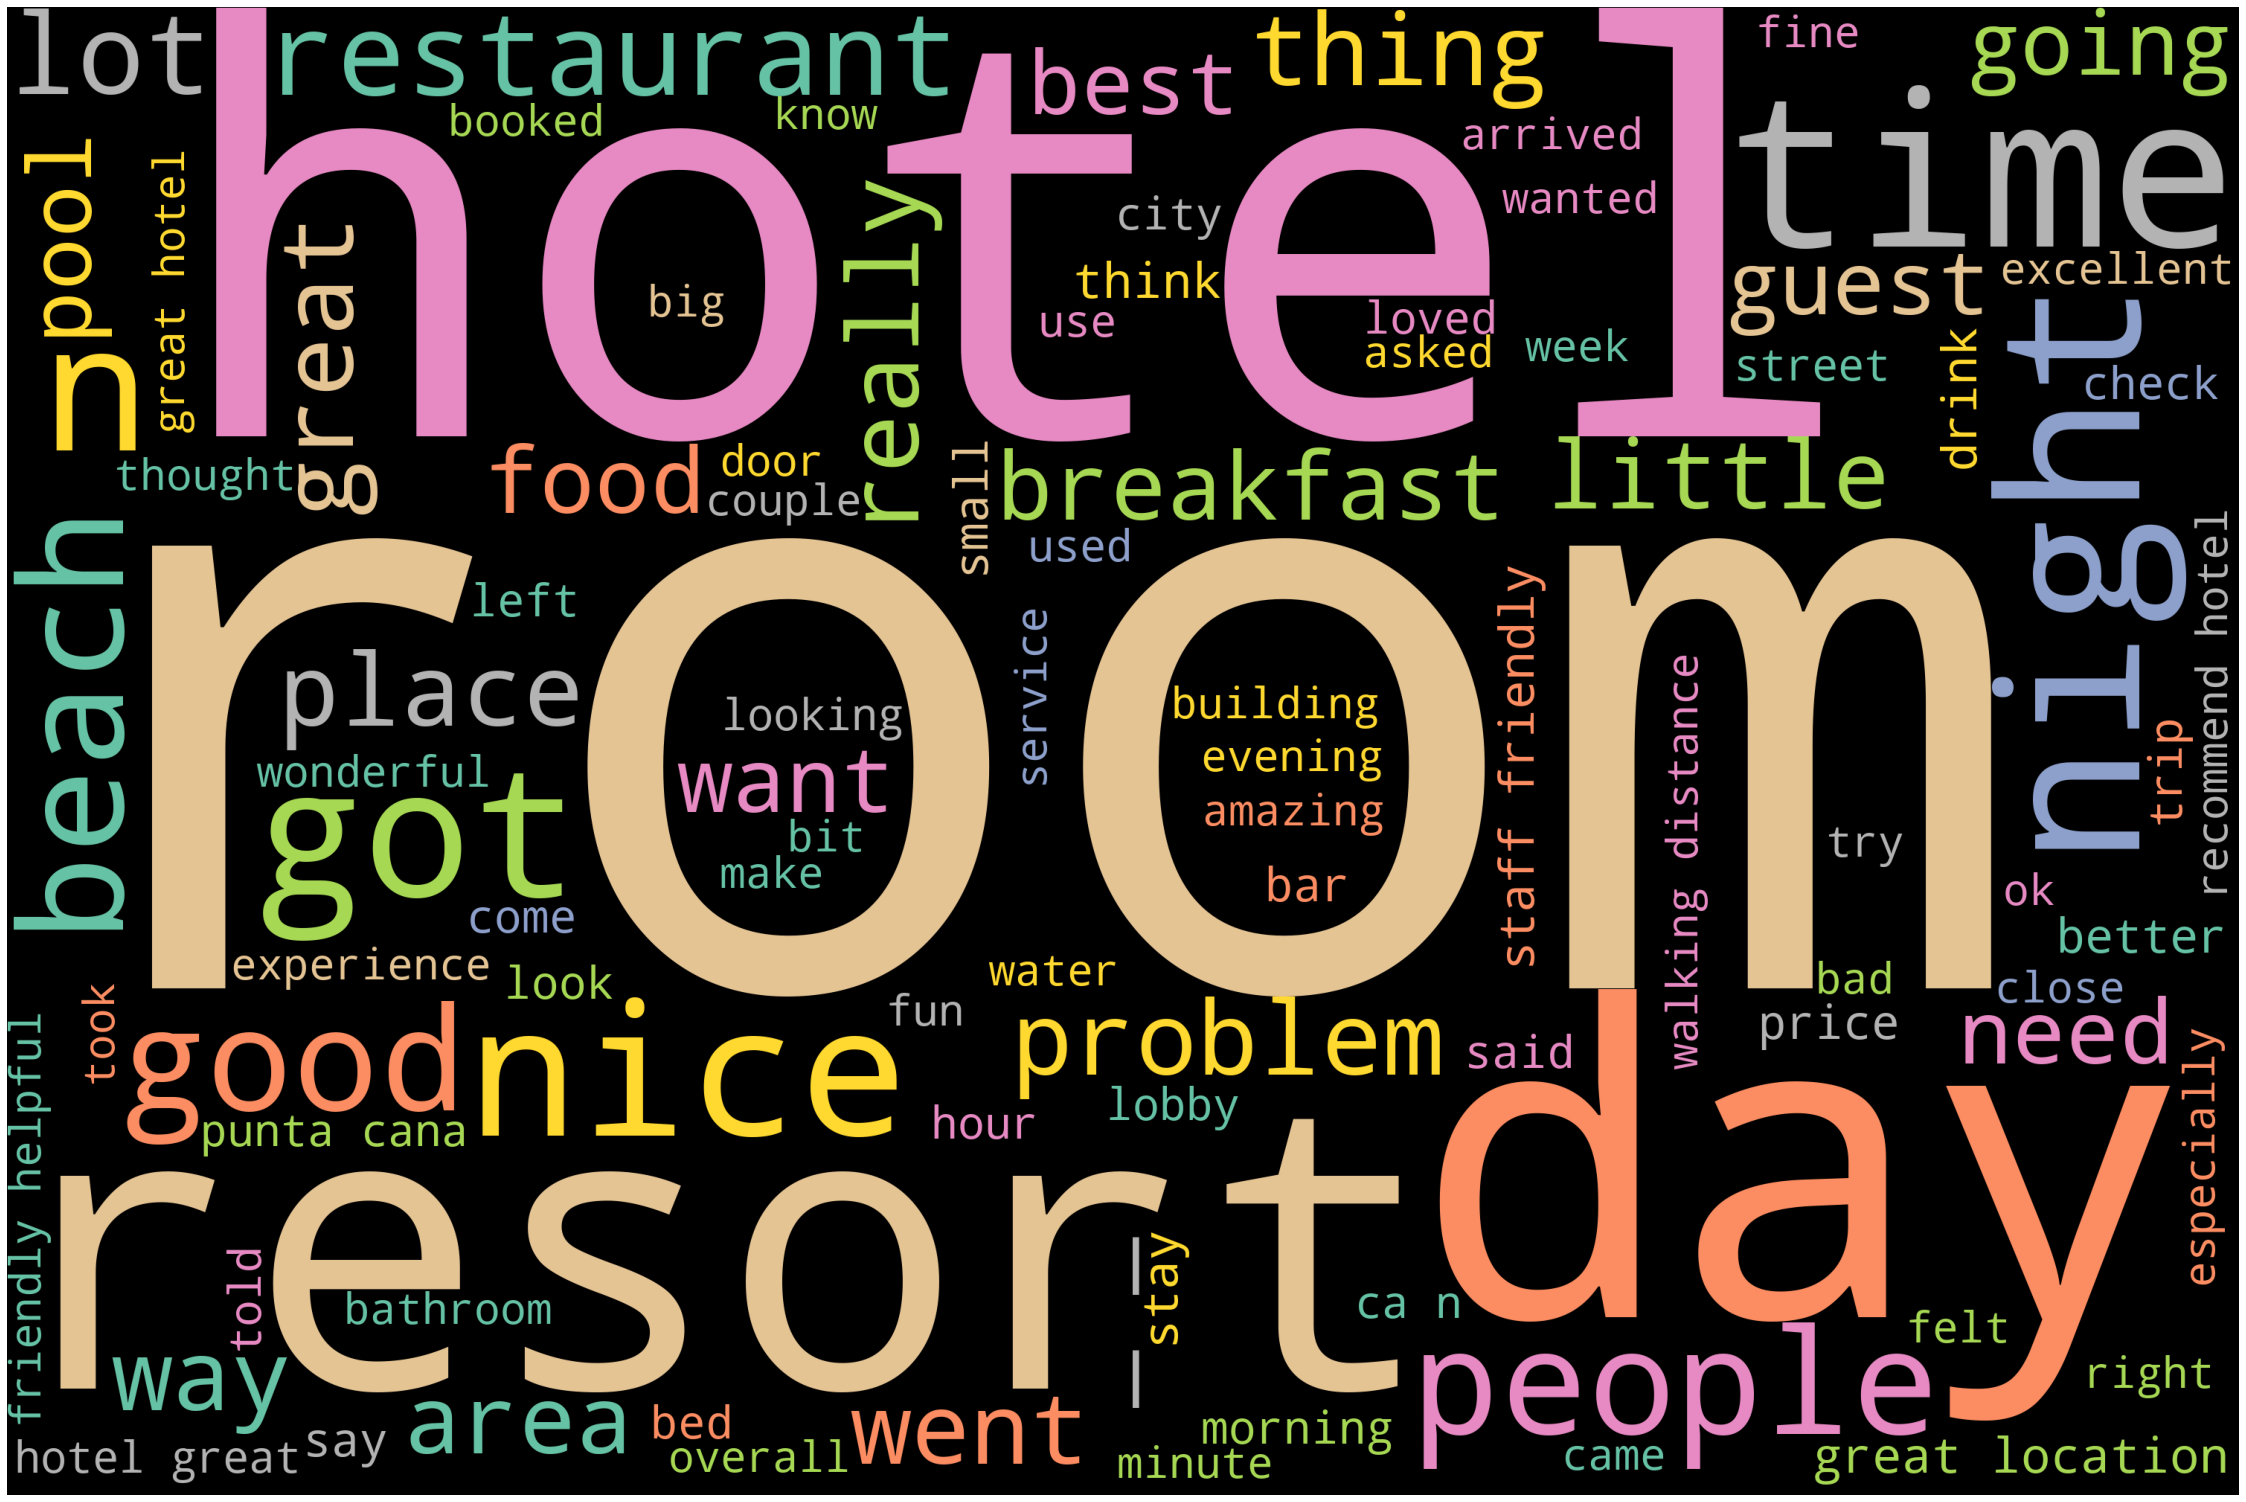

In [69]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

# Sentiment Analysis

In [70]:
from textblob import TextBlob

In [71]:
df['polarity'] = df['lemma'].apply(lambda x: TextBlob(x).sentiment.polarity )
df[['Review','polarity']].head()

Review  polarity
0  nice hotel expensive parking got good deal sta...  0.353265
1  ok nothing special charge diamond member hilto...  0.290304
2  nice rooms not 4  experience hotel monaco seat...  0.294513
3  unique  great stay  wonderful time hotel monac...  0.455556
4  great stay great stay  went seahawk game aweso...  0.424351

# Histogram of Sentiment polarity range

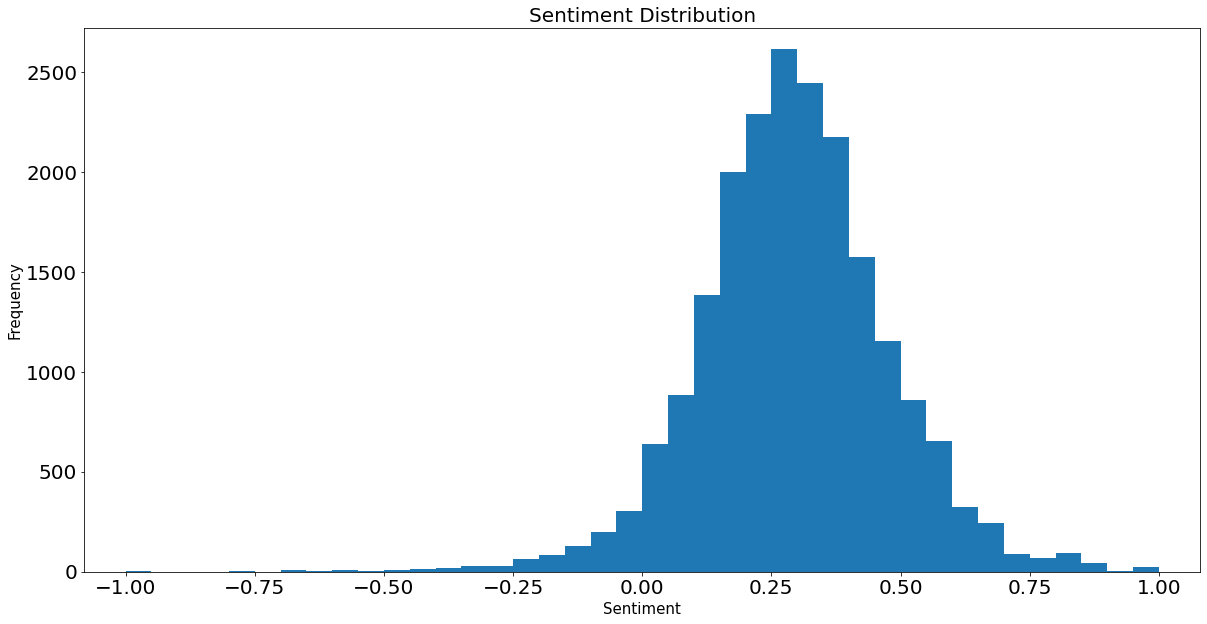

In [72]:
plt.figure(figsize=(20,10))
plt.margins(0.04)
plt.xlabel('Sentiment', fontsize=15)
plt.xticks(fontsize=20)
plt.ylabel('Frequency', fontsize=15)
plt.yticks(fontsize=20)
plt.hist(df['polarity'], bins=40)
plt.title('Sentiment Distribution', fontsize=20)
plt.show()

# Emotion Mining using Afinn dataset

In [73]:
#Sentiment analysis
afinn = pd.read_csv('C:\\Users\\NITESH\\Downloads\\Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [74]:
afinn.head()

word  value
0    abandon     -2
1  abandoned     -2
2   abandons     -2
3   abducted     -2
4  abduction     -2

In [75]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [76]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

C:\ProgramData\Anaconda3\lib\site-packages\spacy\util.py:865: UserWarning: [W095] Model 'en_core_web_sm' (3.3.0) was trained with spaCy v3.3 and may not be 100% compatible with the current version (3.4.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [77]:
df['sentiment_value'] = df['lemma'].apply(calculate_sentiment)

In [78]:
df[['Review','sentiment_value']]

Review  sentiment_value
0      nice hotel expensive parking got good deal sta...               24
1      ok nothing special charge diamond member hilto...               39
2      nice rooms not 4  experience hotel monaco seat...               22
3      unique  great stay  wonderful time hotel monac...               27
4      great stay great stay  went seahawk game aweso...               22
...                                                  ...              ...
20486  best kept secret 3rd time staying charm  not 5...               12
20487  great location price view hotel great quick pl...               19
20488  ok just looks nice modern outside  desk staff ...                7
20489  hotel theft ruined vacation hotel opened sept ...              -20
20490  people talking  ca n t believe excellent ratin...               10

[20491 rows x 2 columns]

In [79]:
# Sentiment score of the whole review
df['sentiment_value'].describe()

count    20491.000000
mean        16.036065
std         14.166224
min        -33.000000
25%          8.000000
50%         14.000000
75%         21.000000
max        209.000000
Name: sentiment_value, dtype: float64

In [80]:
# Sentiment score of the whole review
df[df['sentiment_value']<=0]

Review  Rating  \
42     warwick bad good reviews warwick shocks staff ...       2   
44     austin powers decor familiar  hotel seattlewhe...       2   
65     hated inn terrible  room service horrible staf...       1   
76     stay clear  internet reservation friday rang h...       1   
88     worst hotel experience booked nonsmoking room ...       1   
...                                                  ...     ...   
20421  worst sleep hip tooooo hip nite club building ...       1   
20455  beautiful facilities overall highly disappoint...       2   
20465  not stay hotel brought group february worst ho...       1   
20467  returning la concha nightmare surprising hotel...       1   
20489  hotel theft ruined vacation hotel opened sept ...       1   

                                             no_contract  \
42     [warwick, bad, good, reviews, warwick, shocks,...   
44     [austin, powers, decor, familiar, hotel, seatt...   
65     [hated, inn, terrible, room, service, horrible...   
76     [stay, clear, internet, reservation, friday, r...   
88     [worst, hotel, experience, booked, nonsmoking,...   
...                                                  ...   
20421  [worst, sleep, hip, tooooo, hip, nite, club, b...   
20455  [beautiful, facilities, overall, highly, disap...   
20465  [not, stay, hotel, brought, group, february, w...   
20467  [returning, la, concha, nightmare, surprising,...   
20489  [hotel, theft, ruined, vacation, hotel, opened...   

                                           expanded_text  \
42     warwick bad good reviews warwick shocks staff ...   
44     austin powers decor familiar hotel seattlewher...   
65     hated inn terrible room service horrible staff...   
76     stay clear internet reservation friday rang ho...   
88     worst hotel experience booked nonsmoking room ...   
...                                                  ...   
20421  worst sleep hip tooooo hip nite club building ...   
20455  beautiful facilities overall highly disappoint...   
20465  not stay hotel brought group february worst ho...   
20467  returning la concha nightmare surprising hotel...   
20489  hotel theft ruined vacation hotel opened sept ...   

                                                 no_punc  \
42     warwick bad good reviews warwick shocks staff ...   
44     austin powers decor familiar hotel seattlewher...   
65     hated inn terrible room service horrible staff...   
76     stay clear internet reservation friday rang ho...   
88     worst hotel experience booked nonsmoking room ...   
...                                                  ...   
20421  worst sleep hip tooooo hip nite club building ...   
20455  beautiful facilities overall highly disappoint...   
20465  not stay hotel brought group february worst ho...   
20467  returning la concha nightmare surprising hotel...   
20489  hotel theft ruined vacation hotel opened sept ...   

                                               tokenized  \
42     [warwick, bad, good, reviews, warwick, shocks,...   
44     [austin, powers, decor, familiar, hotel, seatt...   
65     [hated, inn, terrible, room, service, horrible...   
76     [stay, clear, internet, reservation, friday, r...   
88     [worst, hotel, experience, booked, nonsmoking,...   
...                                                  ...   
20421  [worst, sleep, hip, tooooo, hip, nite, club, b...   
20455  [beautiful, facilities, overall, highly, disap...   
20465  [not, stay, hotel, brought, group, february, w...   
20467  [returning, la, concha, nightmare, surprising,...   
20489  [hotel, theft, ruined, vacation, hotel, opened...   

                                                   lower  stopwords  \
42     [warwick, bad, good, reviews, warwick, shocks,...          4   
44     [austin, powers, decor, familiar, hotel, seatt...          8   
65     [hated, inn, terrible, room, service, horrible...          0   
76     [stay, clear, internet, reservation, friday, r...         

In [81]:
df[df['sentiment_value']>=20]

Review  Rating  \
0      nice hotel expensive parking got good deal sta...       4   
1      ok nothing special charge diamond member hilto...       2   
2      nice rooms not 4  experience hotel monaco seat...       3   
3      unique  great stay  wonderful time hotel monac...       5   
4      great stay great stay  went seahawk game aweso...       5   
...                                                  ...     ...   
20450  best destress resort earth 2 weeks destress to...       5   
20462  chic hotel great beaches excellent service gre...       4   
20464  loved la concha  stayed 2 nights 3 days la con...       5   
20468  absolutely wonderful st  regis  spg member exc...       5   
20482  great choice wife chose best western quite bit...       5   

                                             no_contract  \
0      [nice, hotel, expensive, parking, got, good, d...   
1      [ok, nothing, special, charge, diamond, member...   
2      [nice, rooms, not, 4, experience, hotel, monac...   
3      [unique, great, stay, wonderful, time, hotel, ...   
4      [great, stay, great, stay, went, seahawk, game...   
...                                                  ...   
20450  [best, destress, resort, earth, 2, weeks, dest...   
20462  [chic, hotel, great, beaches, excellent, servi...   
20464  [loved, la, concha, stayed, 2, nights, 3, days...   
20468  [absolutely, wonderful, st, regis, spg, member...   
20482  [great, choice, wife, chose, best, western, qu...   

                                           expanded_text  \
0      nice hotel expensive parking got good deal sta...   
1      ok nothing special charge diamond member hilto...   
2      nice rooms not 4 experience hotel monaco seatt...   
3      unique great stay wonderful time hotel monaco ...   
4      great stay great stay went seahawk game awesom...   
...                                                  ...   
20450  best destress resort earth 2 weeks destress to...   
20462  chic hotel great beaches excellent service gre...   
20464  loved la concha stayed 2 nights 3 days la conc...   
20468  absolutely wonderful st regis spg member excit...   
20482  great choice wife chose best western quite bit...   

                                                 no_punc  \
0      nice hotel expensive parking got good deal sta...   
1      ok nothing special charge diamond member hilto...   
2      nice rooms not 4 experience hotel monaco seatt...   
3      unique great stay wonderful time hotel monaco ...   
4      great stay great stay went seahawk game awesom...   
...                                                  ...   
20450  best destress resort earth 2 weeks destress to...   
20462  chic hotel great beaches excellent service gre...   
20464  loved la concha stayed 2 nights 3 days la conc...   
20468  absolutely wonderful st regis spg member excit...   
20482  great choice wife chose best western quite bit...   

                                               tokenized  \
0      [nice, hotel, expensive, parking, got, good, d...   
1      [ok, nothing, special, charge, diamond, member...   
2      [nice, rooms, not, 4, experience, hotel, monac...   
3      [unique, great, stay, wonderful, time, hotel, ...   
4      [great, stay, great, stay, went, seahawk, game...   
...                                                  ...   
20450  [best, destress, resort, earth, 2, weeks, dest...   
20462  [chic, hotel, great, beaches, excellent, servi...   
20464  [loved, la, concha, stayed, 2, nights, 3, days...   
20468  [absolutely, wonderful, st, regis, spg, member...   
20482  [great, choice, wife, chose, best, western, qu...   

                                                   lower  stopwords  \
0      [nice, hotel, expensive, parking, got, good, d...          6   
1      [ok, nothing, special, charge, diamond, member...         16   
2      [nice, rooms, not, 4, experience, hotel, monac...         15   
3      [unique, great, stay, wonderful, time, hotel, ...         

In [82]:
#df['index']=range(0,len(df))

In [83]:
# plt.figure(figsize=(15, 10))
# sns.lineplot(y='sentiment_value',x='index',data=df)

In [84]:
# df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

In [85]:
df['sentiment'] = df['sentiment_value'].apply(lambda x : 'Positive' if x > 0 else ('Negative' if x<0 else 'Neutral'))

In [86]:
df['sentiment']

0        Positive
1        Positive
2        Positive
3        Positive
4        Positive
           ...   
20486    Positive
20487    Positive
20488    Positive
20489    Negative
20490    Positive
Name: sentiment, Length: 20491, dtype: object

In [87]:
Neutral_senti=df[df['sentiment_value']==0]

In [88]:
Positive_senti=df[df['sentiment_value']>0]

In [89]:
Negative_senti=df[df['sentiment_value']<0]

In [90]:
Neutral_senti

Review  Rating  \
118    luxury luxury having stayed suite elses dime  ...       4   
160    cramped noisy overrated husband just stayed ho...       1   
225    great seattle location great downtown hotel  p...       5   
231    worse stay hotel  no help  concierge no idea s...       1   
259    watch bait and switch room rates  rooms accept...       2   
...                                                  ...     ...   
20262  fantastic vaule spent 6 nights hotel end holid...       5   
20312  better view st  regis stayed night prior night...       5   
20405  location  location  location  stayed deluxe ro...       4   
20455  beautiful facilities overall highly disappoint...       2   
20467  returning la concha nightmare surprising hotel...       1   

                                             no_contract  \
118    [luxury, luxury, having, stayed, suite, elses,...   
160    [cramped, noisy, overrated, husband, just, sta...   
225    [great, seattle, location, great, downtown, ho...   
231    [worse, stay, hotel, no, help, concierge, no, ...   
259    [watch, bait, and, switch, room, rates, rooms,...   
...                                                  ...   
20262  [fantastic, vaule, spent, 6, nights, hotel, en...   
20312  [better, view, st, regis, stayed, night, prior...   
20405  [location, location, location, stayed, deluxe,...   
20455  [beautiful, facilities, overall, highly, disap...   
20467  [returning, la, concha, nightmare, surprising,...   

                                           expanded_text  \
118    luxury luxury having stayed suite elses dime s...   
160    cramped noisy overrated husband just stayed ho...   
225    great seattle location great downtown hotel pa...   
231    worse stay hotel no help concierge no idea sit...   
259    watch bait and switch room rates rooms accepta...   
...                                                  ...   
20262  fantastic vaule spent 6 nights hotel end holid...   
20312  better view st regis stayed night prior night ...   
20405  location location location stayed deluxe room ...   
20455  beautiful facilities overall highly disappoint...   
20467  returning la concha nightmare surprising hotel...   

                                                 no_punc  \
118    luxury luxury having stayed suite elses dime s...   
160    cramped noisy overrated husband just stayed ho...   
225    great seattle location great downtown hotel pa...   
231    worse stay hotel no help concierge no idea sit...   
259    watch bait and switch room rates rooms accepta...   
...                                                  ...   
20262  fantastic vaule spent 6 nights hotel end holid...   
20312  better view st regis stayed night prior night ...   
20405  location location location stayed deluxe room ...   
20455  beautiful facilities overall highly disappoint...   
20467  returning la concha nightmare surprising hotel...   

                                               tokenized  \
118    [luxury, luxury, having, stayed, suite, elses,...   
160    [cramped, noisy, overrated, husband, just, sta...   
225    [great, seattle, location, great, downtown, ho...   
231    [worse, stay, hotel, no, help, concierge, no, ...   
259    [watch, bait, and, switch, room, rates, rooms,...   
...                                                  ...   
20262  [fantastic, vaule, spent, 6, nights, hotel, en...   
20312  [better, view, st, regis, stayed, night, prior...   
20405  [location, location, location, stayed, deluxe,...   
20455  [beautiful, facilities, overall, highly, disap...   
20467  [returning, la, concha, nightmare, surprising,...   

                                                   lower  stopwords  \
118    [luxury, luxury, having, stayed, suite, elses,...          4   
160    [cramped, noisy, overrated, husband, just, sta...          3   
225    [great, seattle, location, great, downtown, ho...          1   
231    [worse, stay, hotel, no, help, concierge, no, ...         

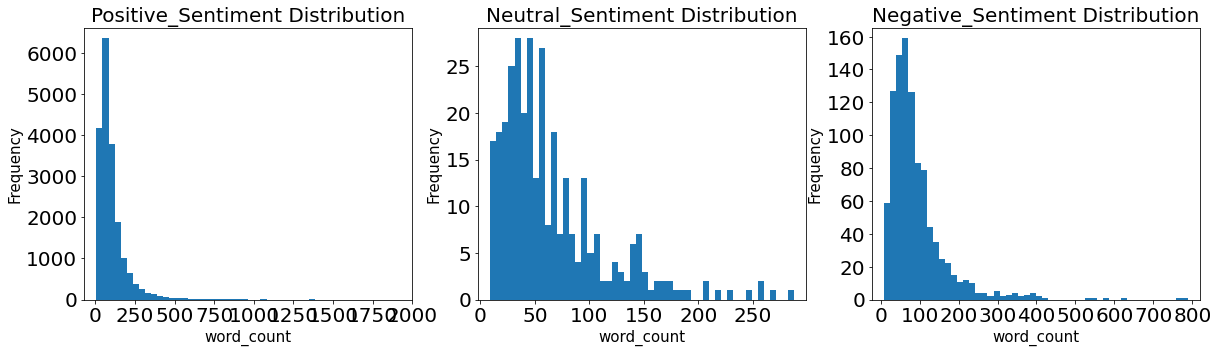

In [91]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.margins(0.04)
plt.xlabel('word_count', fontsize=15)
plt.xticks(fontsize=20)
plt.ylabel('Frequency', fontsize=15)
plt.yticks(fontsize=20)
plt.hist(Positive_senti['word_count'], bins=50)
plt.title('Positive_Sentiment Distribution', fontsize=20)
plt.subplot(1,3,2)
plt.margins(0.04)
plt.xlabel('word_count', fontsize=15)
plt.xticks(fontsize=20)
plt.ylabel('Frequency', fontsize=15)
plt.yticks(fontsize=20)
plt.hist(Neutral_senti['word_count'], bins=50)
plt.title('Neutral_Sentiment Distribution', fontsize=20)
plt.subplot(1,3,3)
plt.margins(0.04)
plt.xlabel('word_count', fontsize=15)
plt.xticks(fontsize=20)
plt.ylabel('Frequency', fontsize=15)
plt.yticks(fontsize=20)
plt.hist(Negative_senti['word_count'], bins=50)
plt.title('Negative_Sentiment Distribution', fontsize=20)

plt.show()

# Wordcloud for Positive reviews

In [92]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [93]:
text = ' '.join(Positive_senti['cleaned_1'])

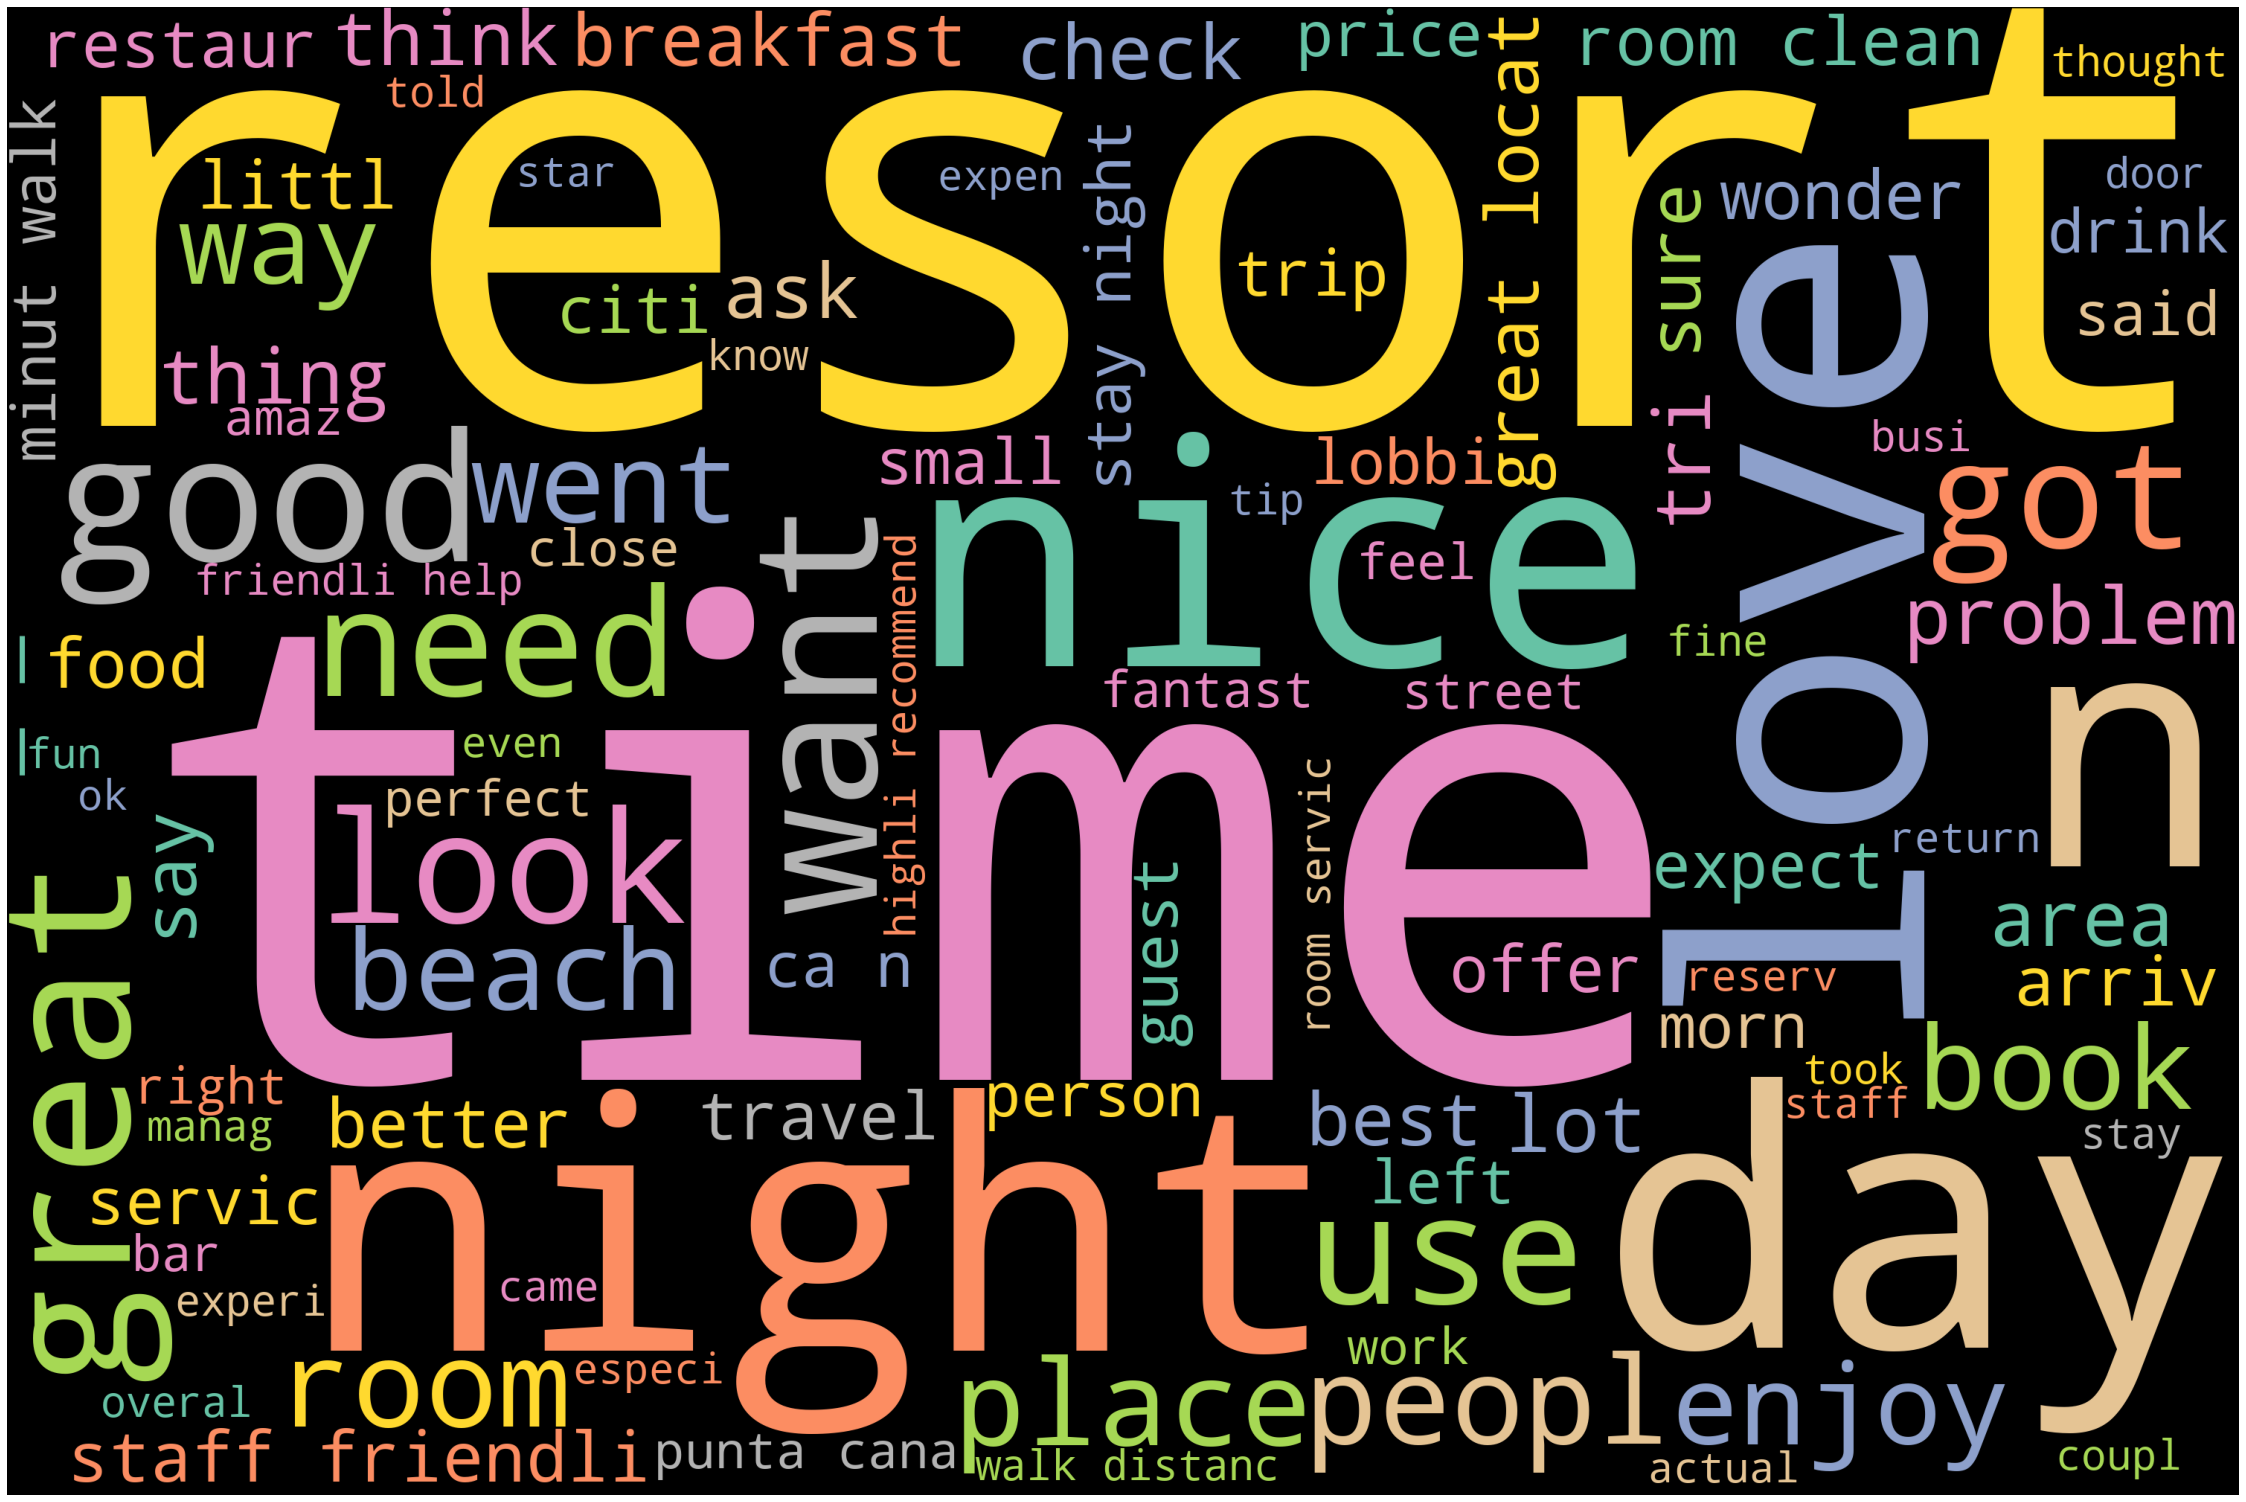

In [94]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

# Wordcloud for Neutral reviews

In [95]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [96]:
text = ' '.join(Neutral_senti['cleaned_1'])

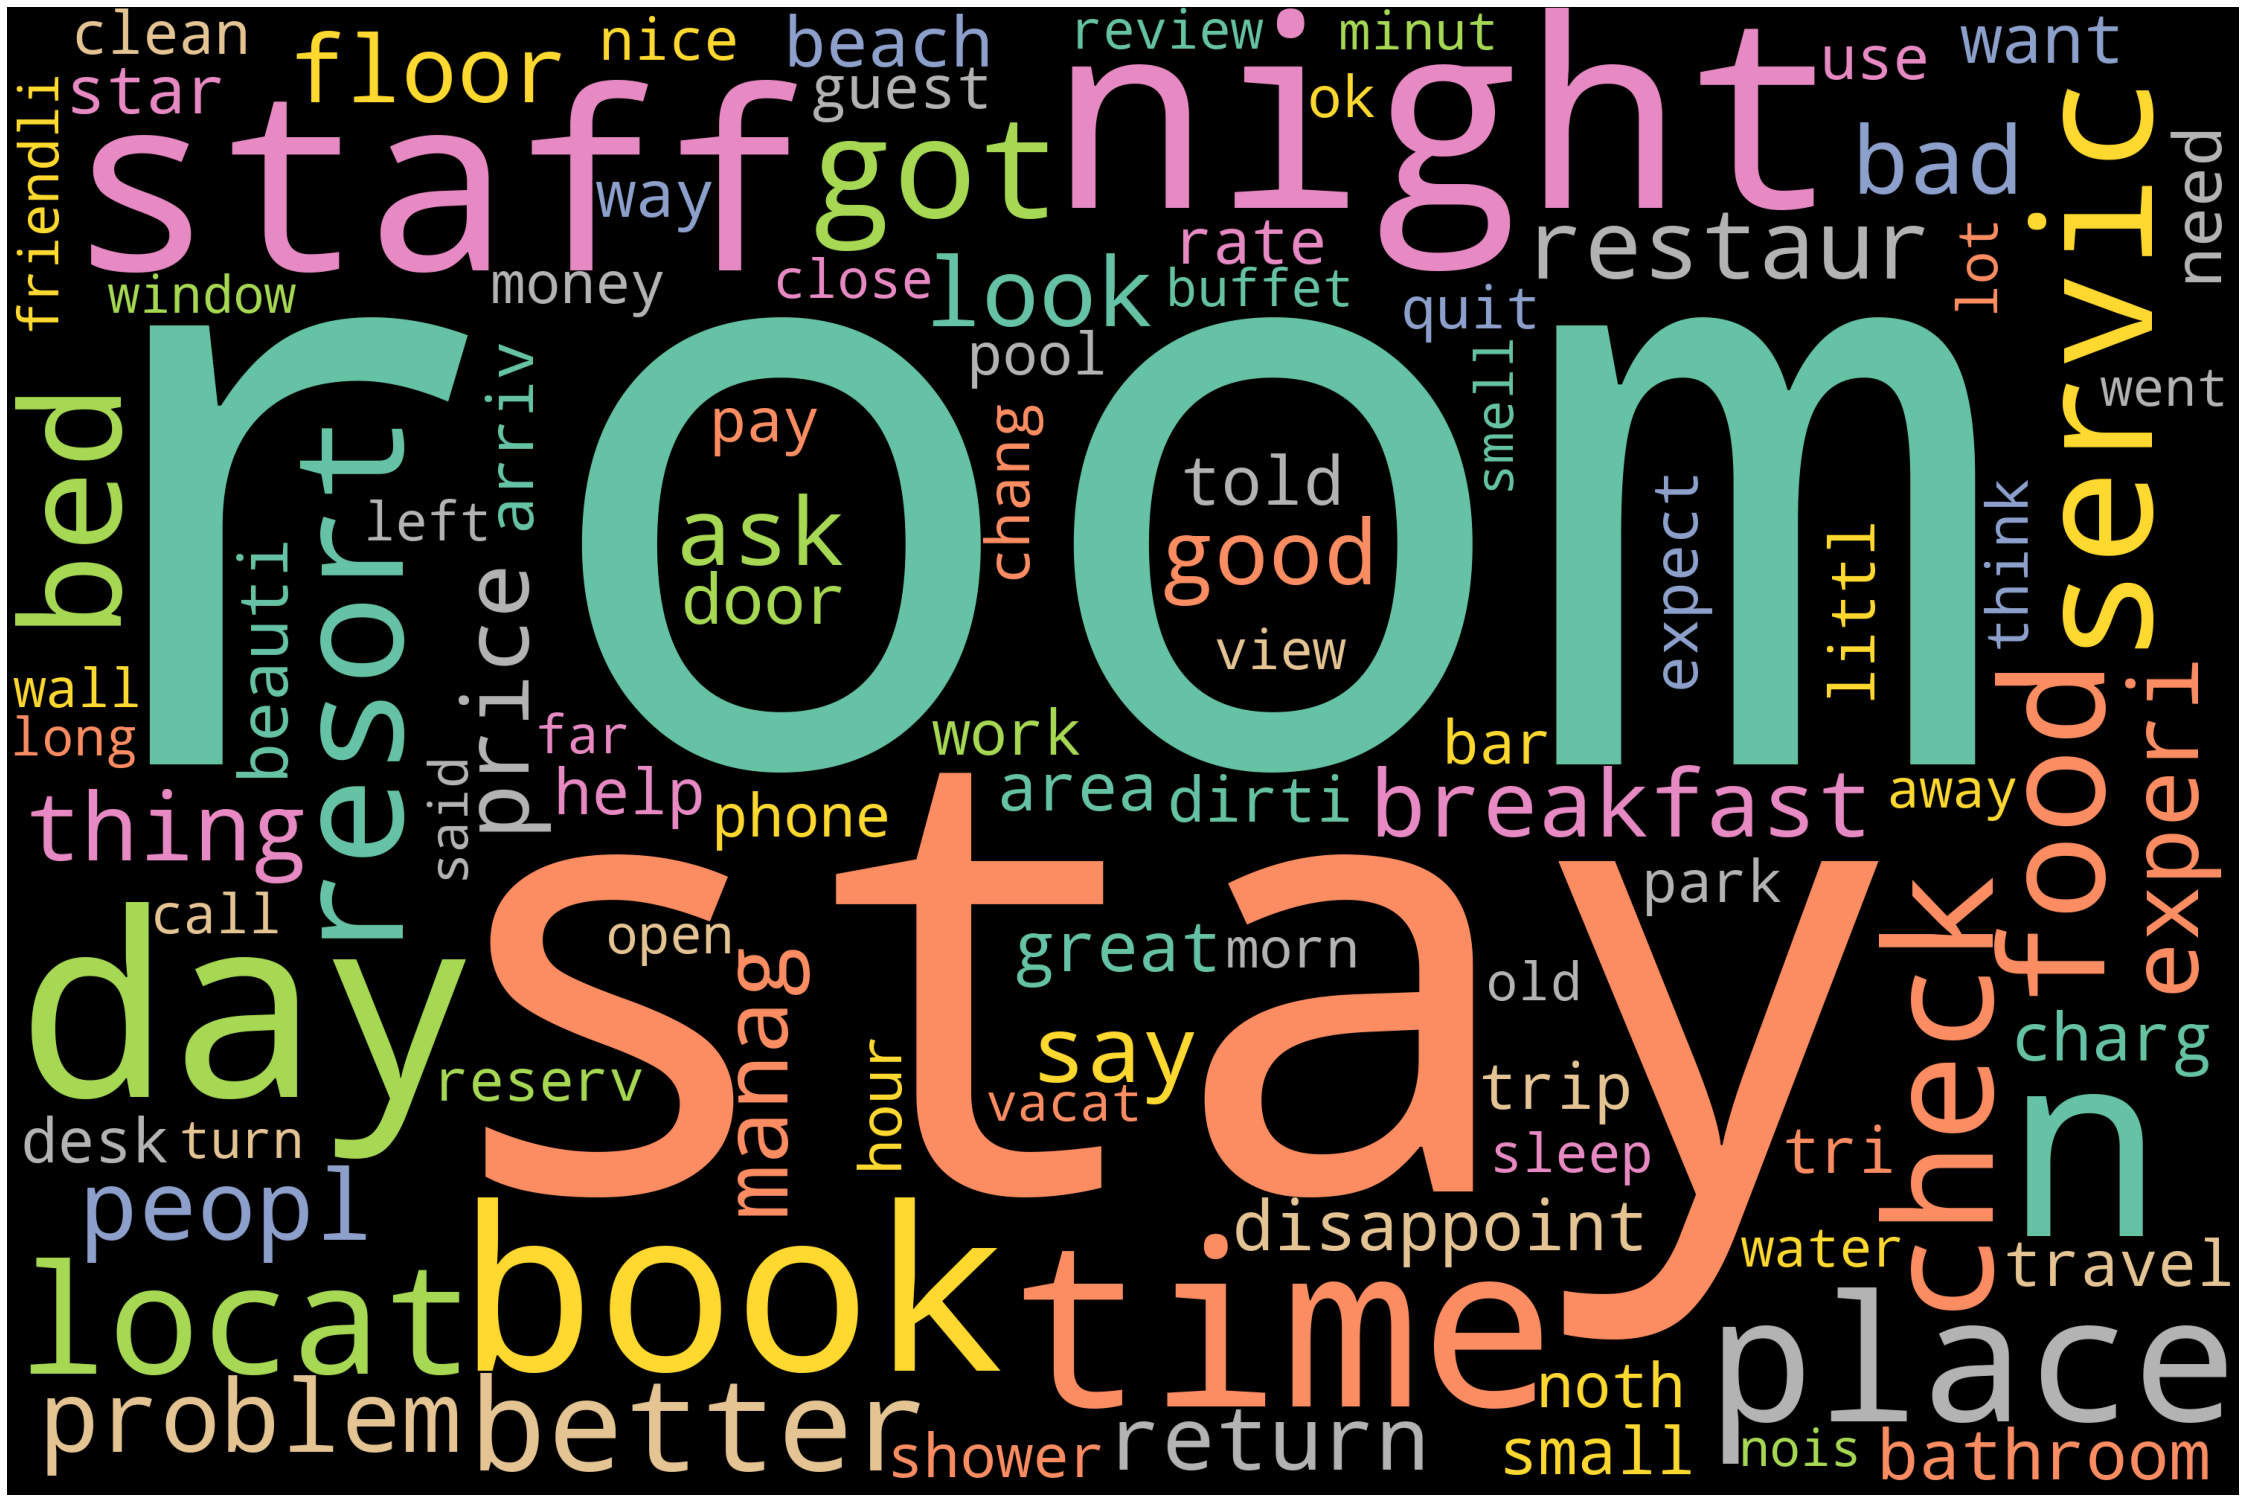

In [97]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

# Wordcloud for Negative reviews

In [98]:
# Import packages
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [99]:
text = ' '.join(Negative_senti['cleaned_1'])

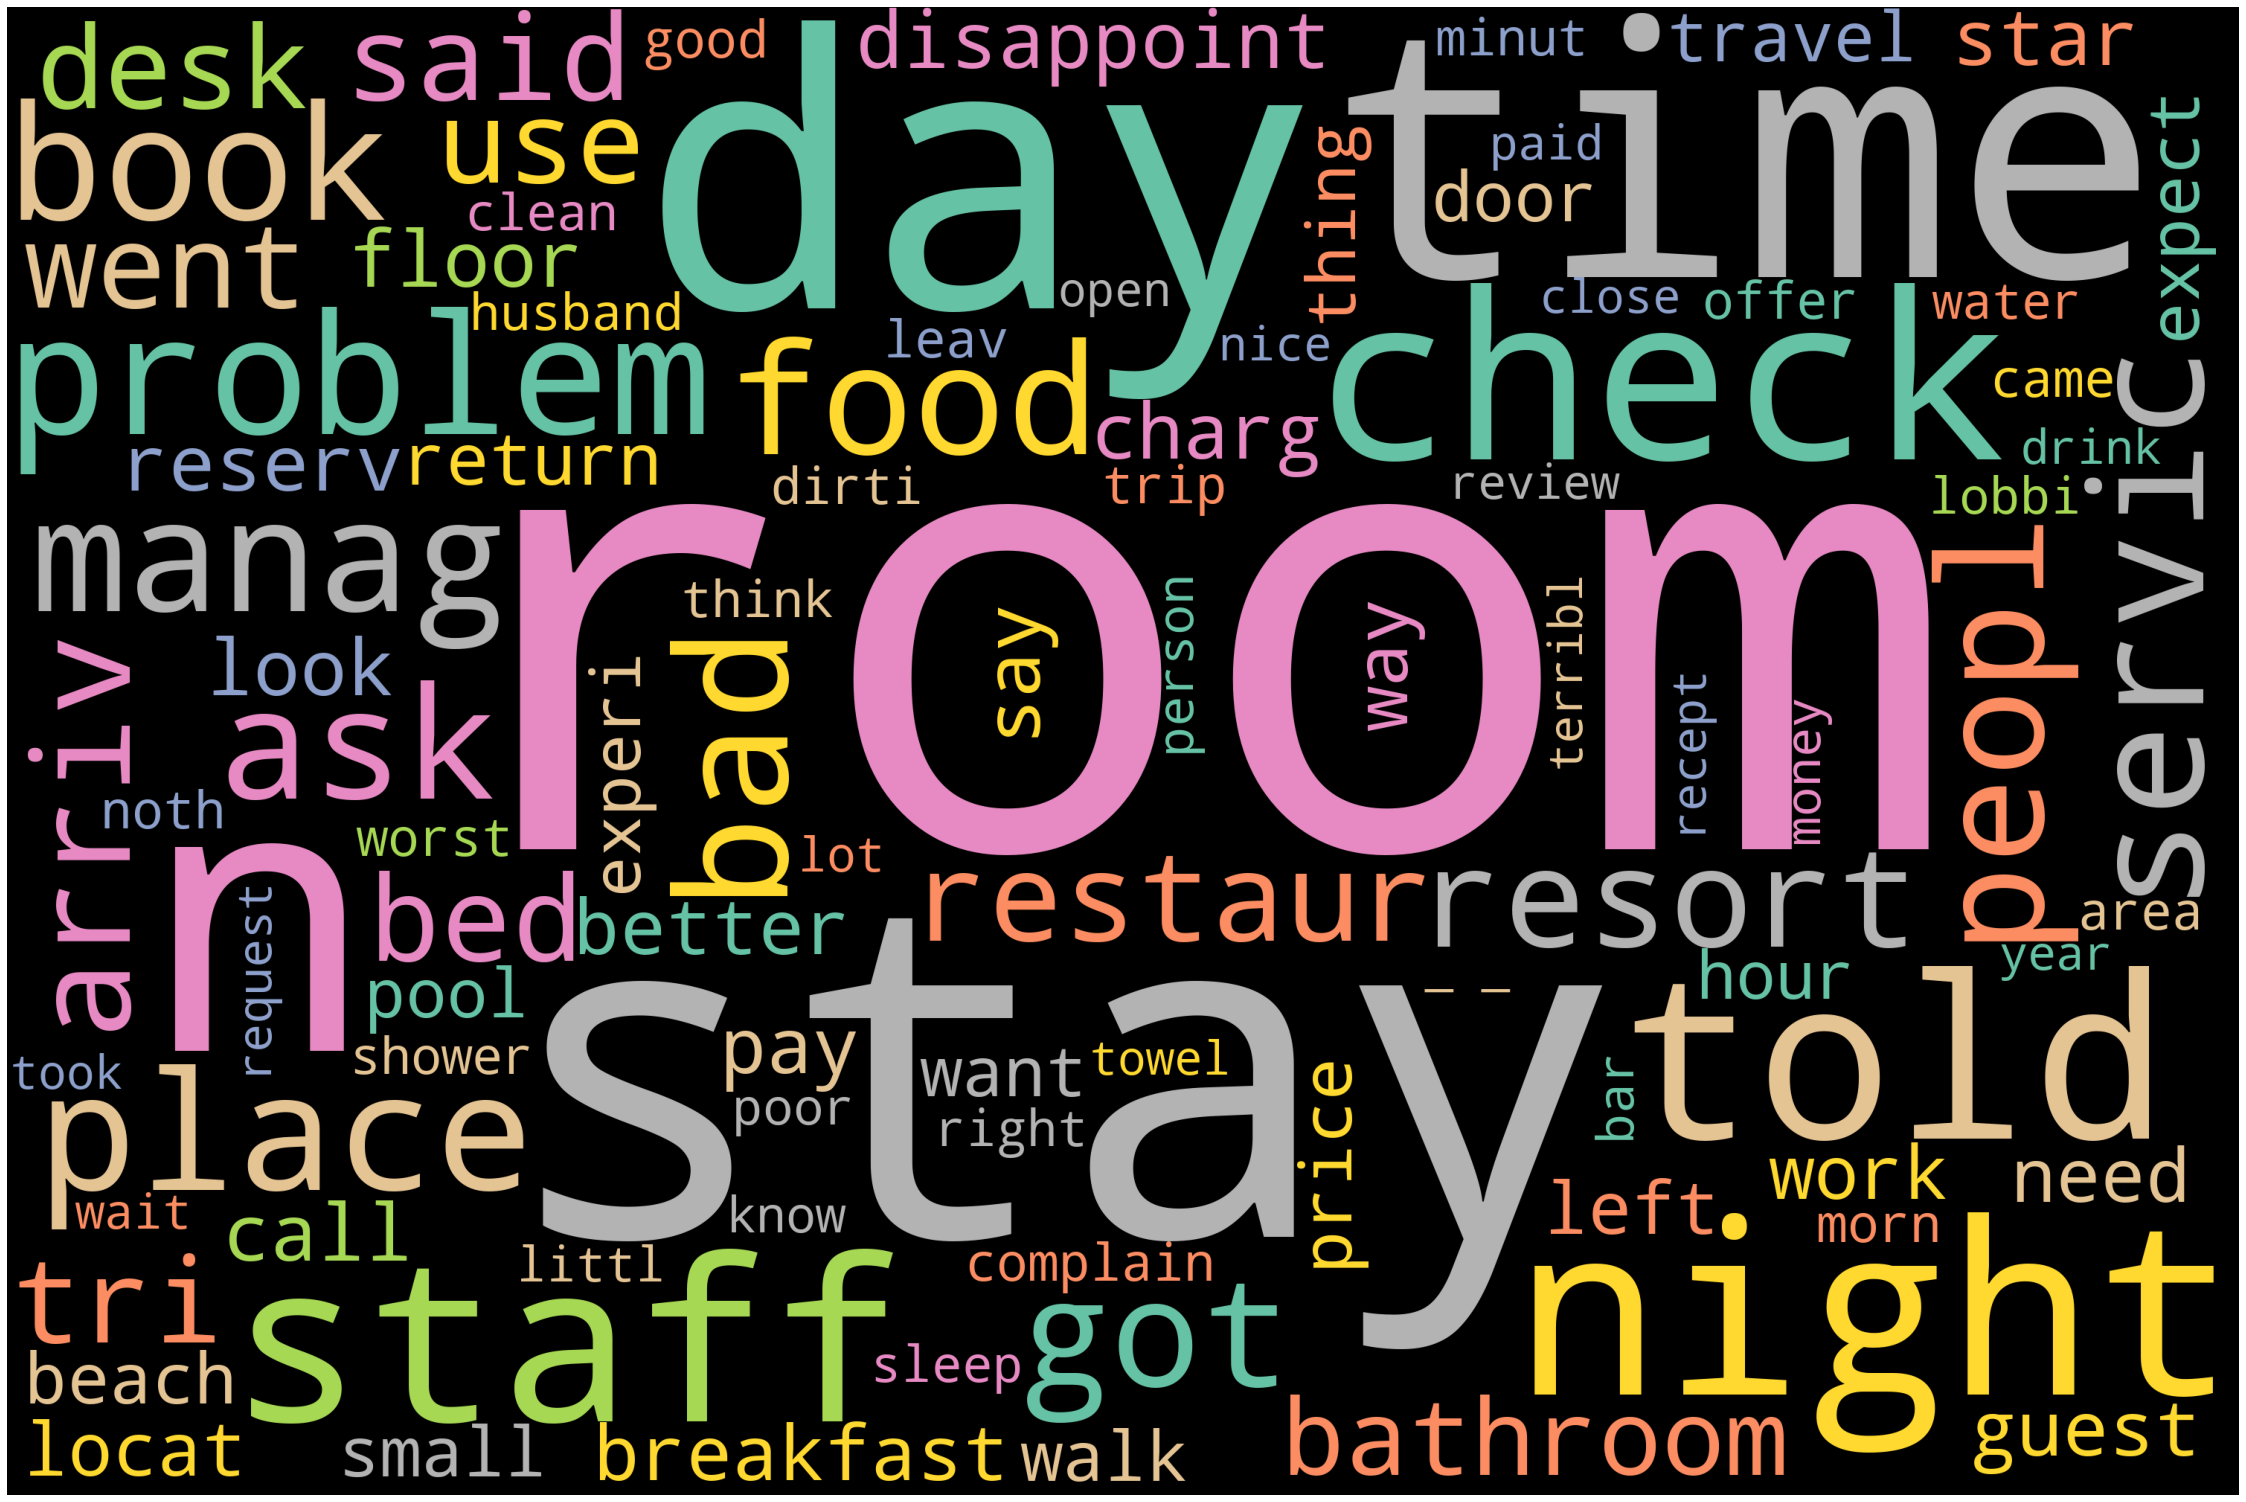

In [100]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

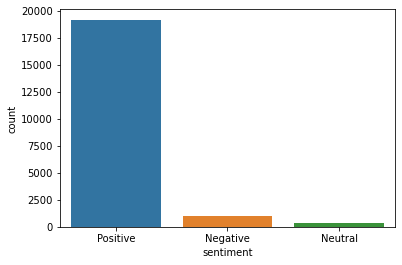

In [101]:
import seaborn as sns
sns.countplot(x='sentiment',data=df)
plt.show()

In [102]:
# plt.figure(figsize=(30, 30))
# sns.countplot(x='sentiment',hue='word_count',data=df)
# plt.show()

# Feature Extraction
# for positive reviews

In [103]:
Positive_senti.head()

Review  Rating  \
0  nice hotel expensive parking got good deal sta...       4   
1  ok nothing special charge diamond member hilto...       2   
2  nice rooms not 4  experience hotel monaco seat...       3   
3  unique  great stay  wonderful time hotel monac...       5   
4  great stay great stay  went seahawk game aweso...       5   

                                         no_contract  \
0  [nice, hotel, expensive, parking, got, good, d...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, rooms, not, 4, experience, hotel, monac...   
3  [unique, great, stay, wonderful, time, hotel, ...   
4  [great, stay, great, stay, went, seahawk, game...   

                                       expanded_text  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4 experience hotel monaco seatt...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                             no_punc  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4 experience hotel monaco seatt...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                           tokenized  \
0  [nice, hotel, expensive, parking, got, good, d...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, rooms, not, 4, experience, hotel, monac...   
3  [unique, great, stay, wonderful, time, hotel, ...   
4  [great, stay, great, stay, went, seahawk, game...   

                                               lower  stopwords  \
0  [nice, hotel, expensive, parking, got, good, d...          6   
1  [ok, nothing, special, charge, diamond, member...         16   
2  [nice, rooms, not, 4, experience, hotel, monac...         15   
3  [unique, great, stay, wonderful, time, hotel, ...          5   
4  [great, stay, great, stay, went, seahawk, game...         17   

                                   stopwords_removed  word_count  char_count  \
0  [nice, hotel, expensive, parking, got, good, d...          82         580   
1  [ok, nothing, special, charge, diamond, member...         240        1667   
2  [nice, rooms, 4, experience, hotel, monaco, se...         215        1406   
3  [unique, great, stay, wonderful, time, hotel, ...          87         585   
4  [great, stay, great, stay, went, seahawk, game...         180        1245   

                                         stp_rem_str  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms 4 experience hotel monaco seattle g...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                              stemmi  \
0  nice hotel expens park got good deal stay hote...   
1  ok noth special charg diamond member hilton de...   
2  nice room 4 experi hotel monaco seattl good ho...   
3  uniqu great stay wonder time hotel monaco loca...   
4  great stay great stay went seahawk game awesom...   

                                               lemma  \
0  nice hotel expens park got good deal stay hote...   
1  ok noth special charg diamond member hilton de...   
2  nice room 4 experi hotel monaco seattl good ho...   
3  uniqu great stay wonder time hotel monaco loca...   
4  great stay great stay went seahawk game awesom...   

                                             cleaned  \
0  nice hotel expens park got good deal stay hote...   
1  ok noth special charg diamond member hilton de...   
2  nice room  experi hotel monaco seattl good hot...   
3  uniqu great stay wonder time hotel monaco loca...   
4  great stay great stay went seahawk game awesom...   

                                           cleaned_1  polarity  \
0  nice expens 

In [104]:
positive_rev=Positive_senti['cleaned_1']

In [105]:
positive_rev=pd.DataFrame(data=positive_rev)

In [106]:
positive_rev

cleaned_1
0      nice expens park got good deal stay anniversar...
1      ok noth special charg diamond member hilton de...
2      nice room experi monaco seattl good n level po...
3      uniqu great stay wonder time monaco locat shor...
4      great stay great stay went seahawk game awesom...
...                                                  ...
20485  impress unfriendli staff check ask higher floo...
20486  best kept secret time stay charm star ca n bea...
20487  great locat price view great quick place sight...
20488  ok look nice modern outsid desk staff n friend...
20490  peopl talk ca n believ rate n ye patricia extr...

[19168 rows x 1 columns]

In [107]:
#feature extraction

# Count Vectorization on Positive reviews/BOW

In [108]:
positive_rev = [cleaned_1.strip() for cleaned_1 in positive_rev.cleaned_1] # remove both the leading and the trailing characters
positive_rev = [cleaned_1 for cleaned_1 in positive_rev if cleaned_1] # removes empty strings, because they are considered in Python as False
positive_rev[0:10]

['nice expens park got good deal stay anniversari arriv late even took advic previou review valet park check quick easi littl disappoint non exist view room room clean nice size bed comfort woke stiff neck high pillow soundproof like heard music room night morn loud bang door open close hear peopl talk hallway mayb noisi neighbor aveda bath product nice goldfish stay nice touch taken advantag stay longer locat great walk distanc shop overal nice experi pay park night',
 'ok noth special charg diamond member hilton decid chain shot anniversari seattl start book suit paid extra websit descript suit bedroom bathroom standard room took print reserv desk show said thing like tv couch ect desk clerk told oh mix suit descript kimpton websit sorri free breakfast got kid embassi suit sit room bathroom bedroom unlik kimpton call suit day stay offer correct fals advertis send kimpton prefer guest websit email ask failur provid suit advertis websit reserv descript furnish hard copi reserv printout

In [109]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(positive_rev)

In [110]:
print(vectorizer.vocabulary_)

{'nice': 20874, 'expens': 11029, 'park': 22504, 'got': 13406, 'good': 13325, 'deal': 8206, 'stay': 29276, 'anniversari': 1407, 'arriv': 1914, 'late': 17455, 'even': 10728, 'took': 31426, 'advic': 546, 'previou': 24059, 'review': 25883, 'valet': 33061, 'check': 5876, 'quick': 24643, 'easi': 9795, 'littl': 17971, 'disappoint': 8952, 'non': 21074, 'exist': 10990, 'view': 33369, 'room': 26257, 'clean': 6372, 'size': 28066, 'bed': 3169, 'comfort': 6770, 'woke': 34440, 'stiff': 29384, 'neck': 20674, 'high': 14566, 'pillow': 23230, 'soundproof': 28683, 'like': 17837, 'heard': 14323, 'music': 20421, 'night': 20926, 'morn': 20149, 'loud': 18246, 'bang': 2688, 'door': 9353, 'open': 21697, 'close': 6478, 'hear': 14320, 'peopl': 22861, 'talk': 30318, 'hallway': 14007, 'mayb': 19147, 'noisi': 21059, 'neighbor': 20729, 'aveda': 2315, 'bath': 2922, 'product': 24217, 'goldfish': 13296, 'touch': 31520, 'taken': 30304, 'advantag': 526, 'longer': 18175, 'locat': 18074, 'great': 13573, 'walk': 33653, 'dis

In [111]:
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [112]:
word_freq_df.sort_values('occurrences',ascending=False)

term  occurrences
26257         room        44395
29276         stay        26835
13573        great        21365
13325         good        17296
29095        staff        15943
...            ...          ...
15428   immediatel            1
15427    immediast            1
15426     immediar            1
15425  immedialtey            1
35057    zzzzzzzzz            1

[35058 rows x 2 columns]

# Count Vectorization on Negative reviews

In [113]:
negative_rev=Negative_senti['cleaned_1']
negative_rev=pd.DataFrame(data=negative_rev)

In [114]:
negative_rev = [cleaned_1.strip() for cleaned_1 in negative_rev.cleaned_1] # remove both the leading and the trailing characters
negative_rev = [cleaned_1 for cleaned_1 in negative_rev if cleaned_1] # removes empty strings, because they are considered in Python as False
negative_rev[0:10]

['warwick bad good review warwick shock staff quit rude room fairli dirti cut ask bandaid request bottl open better servic',
 'austin power decor familiar seattlewher sheet differ color hair okbecaus clean second day bathroom friend cring ask brought flip flop sanit spray dirti shag carpet n wall crawl inch star saw shine wors',
 'hate inn terribl room servic horribl staff un welcom decor recent updat lack complet look manag staff horribl',
 'stay clear internet reserv friday rang hour later add thursday book thursday rang let know arriv late said problem arriv hear oh n book tonight n room total apathi concern say sorri look reserv book sorri apathi final say bb door call author hang say sorri time incompet manag employe complet sour trip stay away',
 'worst experi book nonsmok room onlin advanc stay crown plaza downtown seattl arriv desk staff ask consid smoke room complet unaccept famili clearli state consid smoke room mainli concern infant daughter health particular staff member we

In [115]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(negative_rev)

In [116]:
print(vectorizer.vocabulary_)

{'warwick': 7197, 'bad': 508, 'good': 2833, 'review': 5455, 'shock': 5850, 'staff': 6186, 'quit': 5168, 'rude': 5555, 'room': 5524, 'fairli': 2399, 'dirti': 1852, 'cut': 1604, 'ask': 388, 'bandaid': 537, 'request': 5387, 'bottl': 784, 'open': 4529, 'better': 670, 'servic': 5782, 'austin': 456, 'power': 4981, 'decor': 1687, 'familiar': 2412, 'seattlewher': 5721, 'sheet': 5830, 'differ': 1828, 'color': 1286, 'hair': 2970, 'okbecaus': 4499, 'clean': 1213, 'second': 5725, 'day': 1641, 'bathroom': 583, 'friend': 2664, 'cring': 1553, 'brought': 854, 'flip': 2545, 'flop': 2554, 'sanit': 5623, 'spray': 6166, 'shag': 5812, 'carpet': 995, 'wall': 7178, 'crawl': 1532, 'inch': 3300, 'star': 6213, 'saw': 5650, 'shine': 5842, 'wors': 7367, 'hate': 3020, 'inn': 3376, 'terribl': 6543, 'horribl': 3158, 'un': 6839, 'welcom': 7258, 'recent': 5242, 'updat': 7009, 'lack': 3625, 'complet': 1335, 'look': 3802, 'manag': 3911, 'stay': 6228, 'clear': 1216, 'internet': 3414, 'reserv': 5394, 'friday': 2660, 'rang

In [117]:
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [118]:
word_freq_df.sort_values('occurrences',ascending=False)

term  occurrences
5524       room         2724
6228       stay         1363
4355      night          723
1641        day          701
5782     servic          647
...         ...          ...
4914      poepl            1
4915      poind            1
4917  pointedli            1
2271     evelyn            1
7452        zoo            1

[7453 rows x 2 columns]

# TFidf vectorizer
# Positive Reviews

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 5000)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(positive_rev)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['__', 'aaa', 'abl', 'abl check', 'abl walk', 'absolut', 'absolut beauti', 'absolut gorgeou', 'absolut love', 'absolut wonder', 'abund', 'ac', 'accademia', 'accept', 'access', 'access internet', 'access room', 'accommod', 'accomod', 'accord', 'account', 'accur', 'acknowledg', 'act', 'action', 'activ', 'actual', 'ad', 'ad bonu', 'add', 'addit', 'address', 'adequ', 'adjac', 'adjoin', 'adjoin room', 'adjust', 'admit', 'adult', 'adult child', 'advanc', 'advantag', 'adventur', 'advertis', 'advic', 'advis', 'advisor', 'aerob', 'affect', 'affinia', 'affinia dumont', 'afford', 'afraid', 'afternoon', 'afternoon tea', 'age', 'agenc', 'agent', 'aggress', 'ago', 'agre', 'agre review', 'ahead', 'ahead time', 'air', 'air condit', 'air condit room', 'air condit work', 'air condition', 'aircon', 'aircondit', 'airi', 'airlin', 'airport', 'airport bu', 'airport shuttl', 'al', 'ala', 'ala cart', 'alarm', 'alarm clock', 'albeit', 'alcatraz', 'alcohol', 'alley', 'alloc', 'allow', 'alot', 'alright', 'altern

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# TFidf vectorizer
# Negative reviews

In [120]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 5000)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(negative_rev)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['__', 'abandon', 'abl', 'abl eat', 'abl sleep', 'absolut', 'absolut beauti', 'absolut noth', 'absolut worst', 'abysm', 'ac', 'ac work', 'accept', 'accept room', 'access', 'access road', 'access room', 'accid', 'accommod', 'accomod', 'accompani', 'accor', 'accord', 'account', 'account depart', 'accross', 'accur', 'accus', 'acknowledg', 'act', 'action', 'activ', 'actual', 'actual stay', 'actual told', 'ad', 'adagio', 'add', 'addit', 'addit night', 'additon', 'address', 'adequ', 'adequ room', 'adequ suppli', 'adjac', 'adjoin', 'adjoin room', 'adjust', 'administr', 'admit', 'adult', 'adult child', 'advanc', 'advanc room', 'advantag', 'adventur', 'advertis', 'advic', 'advic stay', 'advis', 'advis stay', 'advisor', 'affair', 'affect', 'afford', 'afraid', 'afternoon', 'age', 'agenc', 'agent', 'aggrav', 'ago', 'agre', 'agre review', 'agusti', 'ahead', 'air', 'air condit', 'air condit room', 'air condit work', 'air condition', 'aircon', 'airi', 'airlin', 'airport', 'al', 'al la', 'al la cart',

# Bi-gram for Positive reviews

In [121]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [122]:
# Top 20 Bi-gram words
from sklearn.feature_extraction.text import CountVectorizer
top2_words = get_top_n2_words(Positive_senti['cleaned_1'], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head(30)

Bi-gram  Freq
0        great locat  2256
1     staff friendli  2230
2         room clean  2124
3         stay night  1789
4         minut walk  1689
5         punta cana  1622
6      friendli help  1491
7       walk distanc  1461
8   highli recommend  1368
9        room servic  1288
10        staff help  1258
11        place stay  1208
12         room nice  1111
13        room small  1019
14       read review   953
15       locat great   937
16        room floor   895
17        great time   879
18       great place   867
19        air condit   854
20        night stay   836
21          san juan   834
22      definit stay   831
23        good locat   793
24         good valu   790
25         food good   783
26         room room   740
27        enjoy stay   720
28          new york   714
29       bed comfort   712

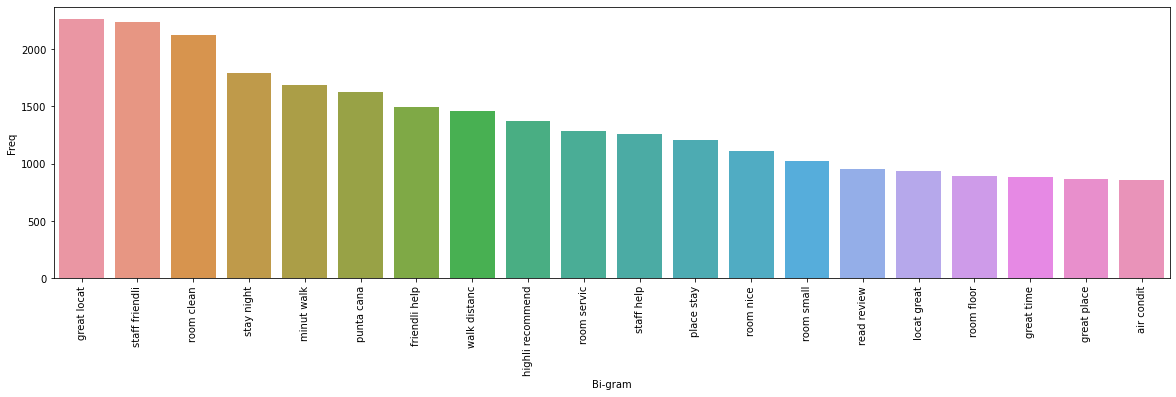

In [123]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (20, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"]);
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"]);

# Bi-gram for Negative reviews

In [124]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [125]:
# Top 20 Bi-gram words
from sklearn.feature_extraction.text import CountVectorizer
top2_words = get_top_n2_words(Negative_senti['cleaned_1'], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head(30)

Bi-gram  Freq
0      credit card    82
1       punta cana    78
2       stay night    75
3    custom servic    70
4       room small    67
5      room servic    63
6       air condit    61
7        room room    48
8       night stay    44
9       room clean    43
10  staff friendli    43
11        san juan    41
12       book room    40
13      room readi    40
14       stay away    38
15      chang room    37
16      desk staff    35
17       stay room    34
18      room avail    34
19     read review    33
20        year old    33
21       room stay    33
22        day stay    33
23      place stay    33
24    guest servic    32
25      worst stay    31
26    worst experi    30
27    royal servic    30
28      smoke room    28
29       hot water    27

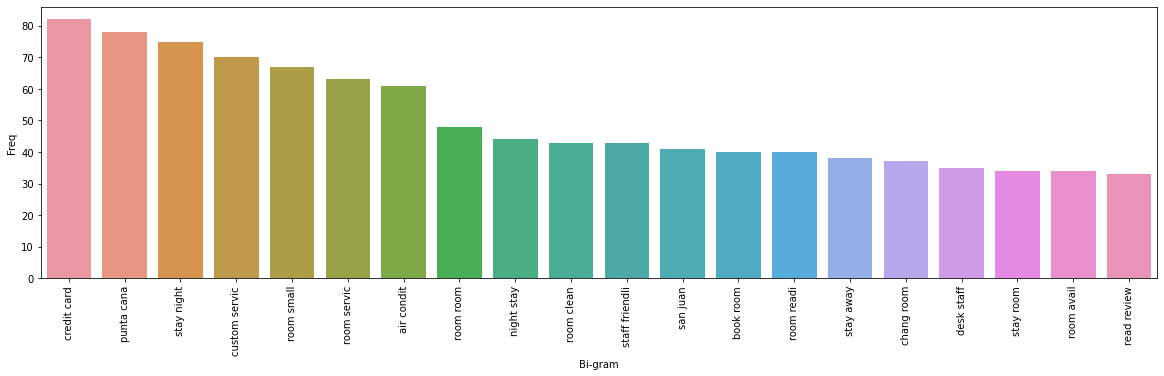

In [126]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (20, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"]);
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"]);

# Tri-gram for Positive reviews

In [127]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [128]:
top3_words = get_top_n3_words(Positive_senti['cleaned_1'], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
top3_df.head(30)

Tri-gram  Freq
0     staff friendli help   836
1            old san juan   353
2           king size bed   335
3          flat screen tv   310
4        great place stay   289
5         good valu money   232
6         la cart restaur   221
7       easi walk distanc   199
8     staff help friendli   199
9    free internet access   197
10         room good size   180
11         non smoke room   170
12      great locat great   165
13        minut walk away   162
14      return night stay   159
15     locat walk distanc   153
16     room clean comfort   150
17       great locat stay   145
18     room spaciou clean   144
19     friendli help room   142
20      staff extrem help   139
21    review trip advisor   132
22       locat minut walk   128
23   clean staff friendli   125
24    friendli help staff   123
25        ocean view room   122
26  staff extrem friendli   121
27       great valu money   121
28        room nice clean   120
29      great great locat   119

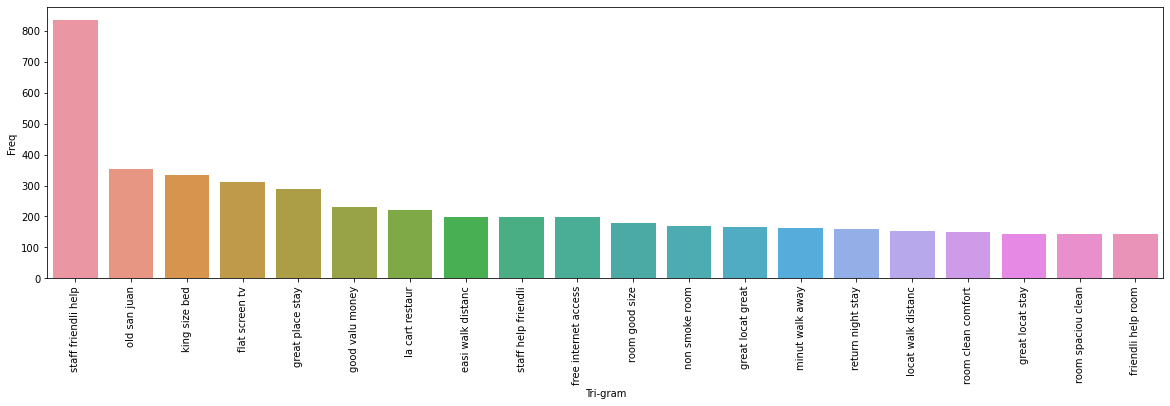

In [129]:
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (20, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"]);
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"]);

# Tri-gram for Negative reviews

In [130]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [131]:
top3_words = get_top_n3_words(Negative_senti['cleaned_1'], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
top3_df.head(30)

Tri-gram  Freq
0         king size bed    15
1     charg credit card    13
2        non smoke room    11
3        room doubl bed    11
4          old san juan     9
5   carib club princess     9
6       told room readi     8
7       air condit work     8
8      stay holiday inn     7
9     resort punta cana     7
10       room king size     7
11      told room avail     7
12           al la cart     7
13    order room servic     6
14         year old son     6
15     long stori short     6
16    went guest servic     6
17          el san juan     6
18  holiday inn express     6
19      room small room     6
20       room singl bed     6
21   red light district     6
22       room call desk     5
23      room smell like     5
24    better place stay     5
25       ask chang room     5
26        stay year ago     5
27      punta cana time     5
28  spoke littl english     5
29   poor custom servic     5

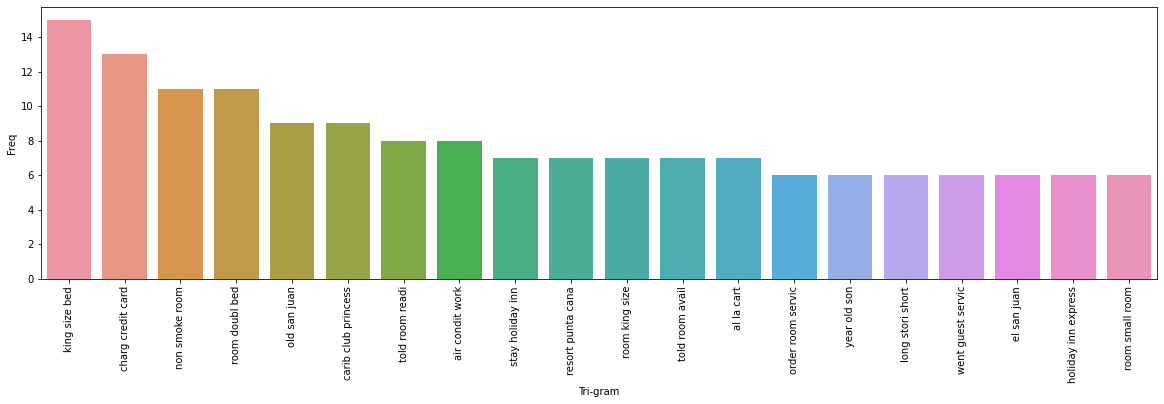

In [132]:
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (20, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"]);
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"]);

### From bi-gram and tri gram for positive reviews and Negative reviews it is clear that room size,bed size,air condition etc are resposible for rating of the hotel.

In [133]:
df.head()

Review  Rating  \
0  nice hotel expensive parking got good deal sta...       4   
1  ok nothing special charge diamond member hilto...       2   
2  nice rooms not 4  experience hotel monaco seat...       3   
3  unique  great stay  wonderful time hotel monac...       5   
4  great stay great stay  went seahawk game aweso...       5   

                                         no_contract  \
0  [nice, hotel, expensive, parking, got, good, d...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, rooms, not, 4, experience, hotel, monac...   
3  [unique, great, stay, wonderful, time, hotel, ...   
4  [great, stay, great, stay, went, seahawk, game...   

                                       expanded_text  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4 experience hotel monaco seatt...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                             no_punc  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4 experience hotel monaco seatt...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                           tokenized  \
0  [nice, hotel, expensive, parking, got, good, d...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, rooms, not, 4, experience, hotel, monac...   
3  [unique, great, stay, wonderful, time, hotel, ...   
4  [great, stay, great, stay, went, seahawk, game...   

                                               lower  stopwords  \
0  [nice, hotel, expensive, parking, got, good, d...          6   
1  [ok, nothing, special, charge, diamond, member...         16   
2  [nice, rooms, not, 4, experience, hotel, monac...         15   
3  [unique, great, stay, wonderful, time, hotel, ...          5   
4  [great, stay, great, stay, went, seahawk, game...         17   

                                   stopwords_removed  word_count  char_count  \
0  [nice, hotel, expensive, parking, got, good, d...          82         580   
1  [ok, nothing, special, charge, diamond, member...         240        1667   
2  [nice, rooms, 4, experience, hotel, monaco, se...         215        1406   
3  [unique, great, stay, wonderful, time, hotel, ...          87         585   
4  [great, stay, great, stay, went, seahawk, game...         180        1245   

                                         stp_rem_str  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms 4 experience hotel monaco seattle g...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                              stemmi  \
0  nice hotel expens park got good deal stay hote...   
1  ok noth special charg diamond member hilton de...   
2  nice room 4 experi hotel monaco seattl good ho...   
3  uniqu great stay wonder time hotel monaco loca...   
4  great stay great stay went seahawk game awesom...   

                                               lemma  \
0  nice hotel expens park got good deal stay hote...   
1  ok noth special charg diamond member hilton de...   
2  nice room 4 experi hotel monaco seattl good ho...   
3  uniqu great stay wonder time hotel monaco loca...   
4  great stay great stay went seahawk game awesom...   

                                             cleaned  \
0  nice hotel expens park got good deal stay hote...   
1  ok noth special charg diamond member hilton de...   
2  nice room  experi hotel monaco seattl good hot...   
3  uniqu great stay wonder time hotel monaco loca...   
4  great stay great stay went seahawk game awesom...   

                                           cleaned_1  polarity  \
0  nice expens 

In [134]:
df.to_csv(r'finaldata.csv',index=True)

In [135]:
corpus = df['cleaned_1'].tolist()

In [136]:
corpus

['nice expens park got good deal stay anniversari arriv late even took advic previou review valet park check quick easi littl disappoint non exist view room room clean nice size bed comfort woke stiff neck high pillow soundproof like heard music room night morn loud bang door open close hear peopl talk hallway mayb noisi neighbor aveda bath product nice goldfish stay nice touch taken advantag stay longer locat great walk distanc shop overal nice experi pay park night',
 'ok noth special charg diamond member hilton decid chain shot anniversari seattl start book suit paid extra websit descript suit bedroom bathroom standard room took print reserv desk show said thing like tv couch ect desk clerk told oh mix suit descript kimpton websit sorri free breakfast got kid embassi suit sit room bathroom bedroom unlik kimpton call suit day stay offer correct fals advertis send kimpton prefer guest websit email ask failur provid suit advertis websit reserv descript furnish hard copi reserv printout

In [137]:
df['sentiment'] = df['sentiment'].replace({'Negative': -1})
df['sentiment'] = df['sentiment'].replace({'Positive': 1})
df['sentiment'] = df['sentiment'].replace({'Neutral': 0})

In [138]:
number_form=df['sentiment']

In [139]:
number_form

0        1
1        1
2        1
3        1
4        1
        ..
20486    1
20487    1
20488    1
20489   -1
20490    1
Name: sentiment, Length: 20491, dtype: int64

# TFIDF

In [140]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=4000)
df_tf_idf= vectorizer.fit_transform(corpus).toarray()

In [141]:
df_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [142]:
import pickle
pickle_out=open('vectorizer.pkl','wb')
pickle.dump(vectorizer,pickle_out)
pickle_out.close()

In [143]:
xtfidf = pd.DataFrame(df_tf_idf)
xtfidf

0     1     2     3     4     5         6     7     8     9     ...  \
0       0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  ...   
1       0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  ...   
2       0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  ...   
3       0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  ...   
4       0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  ...   
...     ...   ...   ...   ...   ...   ...       ...   ...   ...   ...  ...   
20486   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  ...   
20487   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  ...   
20488   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  ...   
20489   0.0   0.0   0.0   0.0   0.0   0.0  0.040392   0.0   0.0   0.0  ...   
20490   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  ...   

           3990  3991  3992  3993  3994  3995  3996  3997  3998  3999  
0      0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1      0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2      0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3      0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4      0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
20486  0.144895   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
20487  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
20488  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
20489  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
20490  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[20491 rows x 4000 columns]

In [144]:
ydf=pd.DataFrame(number_form)
ydf.value_counts()

sentiment
 1           19168
-1             998
 0             325
dtype: int64

# Train and Test split

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
x_traintfidf, x_testtfidf,y_traintfidf,y_testtfidf = train_test_split(xtfidf,ydf, test_size=0.33,random_state=0)

In [147]:
x_traintfidf.shape,y_traintfidf.shape, x_testtfidf.shape,y_testtfidf.shape

((13728, 4000), (13728, 1), (6763, 4000), (6763, 1))

# Balancing the splited data using SMOTE method

In [148]:
!pip install imblearn



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [149]:
from imblearn.over_sampling import SMOTE

In [150]:
upsample = SMOTE()
x_traintfidf1, y_traintfidf1 = upsample.fit_resample(x_traintfidf, y_traintfidf)

In [151]:
cv = CountVectorizer(max_features=4000)
BOW = cv.fit_transform(corpus).toarray()
BOW.shape

(20491, 4000)

In [152]:
xbow=pd.DataFrame(BOW)
xbow

0     1     2     3     4     5     6     7     8     9     ...  3990  \
0         0     0     0     0     0     0     0     0     0     0  ...     0   
1         0     0     0     0     0     0     0     0     0     0  ...     0   
2         0     0     0     0     0     0     0     0     0     0  ...     0   
3         0     0     0     0     0     0     0     0     0     0  ...     0   
4         0     0     0     0     0     0     0     0     0     0  ...     0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
20486     0     0     0     0     0     0     0     0     0     0  ...     1   
20487     0     0     0     0     0     0     0     0     0     0  ...     0   
20488     0     0     0     0     0     0     0     0     0     0  ...     0   
20489     0     0     0     0     0     0     2     0     0     0  ...     0   
20490     0     0     0     0     0     0     0     0     0     0  ...     0   

       3991  3992  3993  3994  3995  3996  3997  3998  3999  
0         0     0     0     0     0     0     0     0     0  
1         0     0     0     0     0     0     0     0     0  
2         0     0     0     0     0     0     0     0     0  
3         0     0     0     0     0     0     0     0     0  
4         0     0     0     0     0     0     0     0     0  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...  
20486     0     0     0     0     0     0     0     0     0  
20487     0     0     0     0     0     0     0     0     0  
20488     0     0     0     0     0     0     0     0     0  
20489     0     0     0     0     0     0     0     0     0  
20490     0     0     0     0     0     0     0     0     0  

[20491 rows x 4000 columns]

In [153]:
x_trainbow, x_testbow,y_trainbow,y_testbow = train_test_split(xbow,ydf, test_size=0.33,random_state=0)

In [154]:
x_trainbow.shape,y_trainbow.shape, x_testbow.shape,y_testbow.shape

((13728, 4000), (13728, 1), (6763, 4000), (6763, 1))

# Now, Balancing the splited (BOW feature) data using SMOTE method

In [155]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_trainbow1, y_trainbow1 = oversample.fit_resample(x_trainbow, y_trainbow)

In [156]:
ydf=pd.DataFrame(y_trainbow1)
ydf.value_counts()

sentiment
-1           12814
 0           12814
 1           12814
dtype: int64

# Evaluation Metric

In [157]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pickle
from sklearn.metrics import f1_score,accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. SVM 

# SVM classification on BOW features on balanced data

In [158]:
from sklearn.svm import LinearSVC
#support vector classifier

In [159]:
classifier1 = LinearSVC()
classifier1.fit(x_trainbow1, y_trainbow1)

pred_test = classifier1.predict(x_testbow)
pred_train=classifier1.predict(x_trainbow1)
accuracy_train1=accuracy_score(y_trainbow1,pred_train)*100
accuracy_test1 = accuracy_score(y_testbow, pred_test) * 100
print('Accuracy of Training data =',accuracy_train1)
print("Accuracy of Test data =", accuracy_test1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy of Training data = 96.08761250715364
Accuracy of Test data = 93.40529350879787


In [160]:
print(classification_report(y_testbow, pred_test))

              precision    recall  f1-score   support

          -1       0.51      0.55      0.53       306
           0       0.10      0.13      0.11       103
           1       0.97      0.97      0.97      6354

    accuracy                           0.93      6763
   macro avg       0.53      0.55      0.54      6763
weighted avg       0.94      0.93      0.94      6763



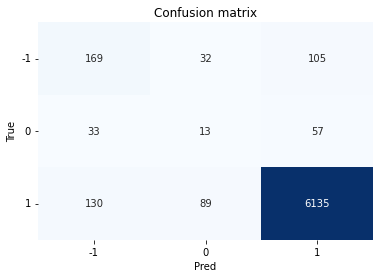

In [161]:
from sklearn import metrics
classes = np.unique(y_testbow)
con_mat = metrics.confusion_matrix(y_testbow, pred_test)
fig, ax = plt.subplots()
sns.heatmap(con_mat, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);


# SVM classification on TFIDF features on balanced data

In [162]:
model = LinearSVC()
model.fit(x_traintfidf1, y_traintfidf1)
pred_test = model.predict(x_testtfidf)
pred_train=model.predict(x_traintfidf1)
accuracy_train2=accuracy_score(y_traintfidf1,pred_train)*100
accuracy_test2 = accuracy_score(y_testtfidf, pred_test) * 100
print('Accuracy of Training data =',accuracy_train2)
print("Accuracy of Test data =", accuracy_test2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Training data = 99.93756828468862
Accuracy of Test data = 95.51973976046133


In [163]:
print(classification_report(y_testtfidf, pred_test))

              precision    recall  f1-score   support

          -1       0.64      0.71      0.68       306
           0       0.16      0.12      0.13       103
           1       0.98      0.98      0.98      6354

    accuracy                           0.96      6763
   macro avg       0.59      0.60      0.60      6763
weighted avg       0.95      0.96      0.95      6763



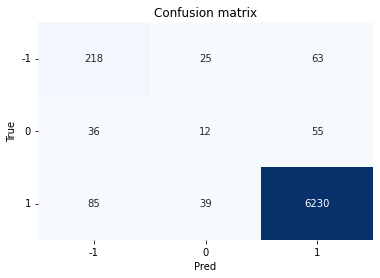

In [164]:
from sklearn import metrics
classes = np.unique(y_testtfidf)
cm0 = metrics.confusion_matrix(y_testtfidf, pred_test)
fig, ax = plt.subplots()
sns.heatmap(cm0, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

# 2. Random Forest

In [165]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest classification on BOW features on balanced data

In [166]:
classifier3 = RandomForestClassifier(n_estimators=400)
classifier3.fit(x_trainbow1, y_trainbow1)
pred_test = classifier3.predict(x_testbow)
pred_train=classifier3.predict(x_trainbow1)
accuracy_train3=accuracy_score(y_trainbow1,pred_train)*100
accuracy_test3 = accuracy_score(y_testbow, pred_test) * 100
print('Accuracy of Training data =',accuracy_train3)
print("Accuracy of Test data =", accuracy_test3)

C:\Users\NITESH\AppData\Local\Temp/ipykernel_21104/3224483528.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier3.fit(x_trainbow1, y_trainbow1)


Accuracy of Training data = 98.20248686332657
Accuracy of Test data = 94.33683276652374


In [167]:
print(classification_report(y_testbow, pred_test))

              precision    recall  f1-score   support

          -1       0.51      0.38      0.43       306
           0       0.14      0.02      0.03       103
           1       0.96      0.99      0.97      6354

    accuracy                           0.94      6763
   macro avg       0.54      0.46      0.48      6763
weighted avg       0.93      0.94      0.93      6763



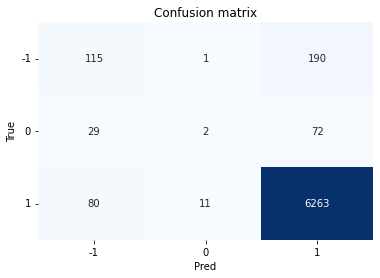

In [168]:
from sklearn import metrics
classes = np.unique(y_testbow)
cm0 = metrics.confusion_matrix(y_testbow, pred_test)
fig, ax = plt.subplots()
sns.heatmap(cm0, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

# Random Forest classification on TFIDF features on balanced data

In [169]:
classifier4 = RandomForestClassifier(n_estimators=400)
classifier4.fit(x_traintfidf1, y_traintfidf1)
pred_test = classifier4.predict(x_testtfidf)
pred_train=classifier4.predict(x_traintfidf1)
accuracy_train4=accuracy_score(y_traintfidf1,pred_train)*100
accuracy_test4 = accuracy_score(y_testtfidf, pred_test) * 100
print('Accuracy of Training data =',accuracy_train4)
print("Accuracy of Test data =", accuracy_test4)

C:\Users\NITESH\AppData\Local\Temp/ipykernel_21104/679882779.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier4.fit(x_traintfidf1, y_traintfidf1)


Accuracy of Training data = 100.0
Accuracy of Test data = 94.52905515303858


In [170]:
print(classification_report(y_testtfidf, pred_test))

              precision    recall  f1-score   support

          -1       0.58      0.33      0.42       306
           0       0.00      0.00      0.00       103
           1       0.95      0.99      0.97      6354

    accuracy                           0.95      6763
   macro avg       0.51      0.44      0.46      6763
weighted avg       0.92      0.95      0.93      6763



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


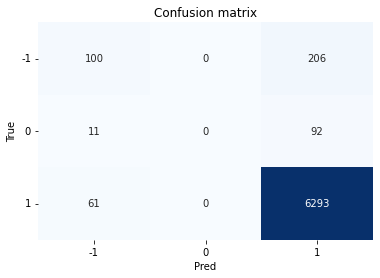

In [171]:
from sklearn import metrics
classes = np.unique(y_testtfidf)
cm0 = metrics.confusion_matrix(y_testtfidf, pred_test)
fig, ax = plt.subplots()
sns.heatmap(cm0, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

# 3. Naive Bayes classifier for multinomial models

In [172]:
from sklearn.naive_bayes import MultinomialNB

# Multinomial on BOW features on balanced data

In [173]:
classifier5 = MultinomialNB()
classifier5.fit(x_trainbow1, y_trainbow1)
pred_test = classifier5.predict(x_testbow)
pred_train=classifier5.predict(x_trainbow1)
accuracy_train5=accuracy_score(y_trainbow1,pred_train)*100
accuracy_test5= accuracy_score(y_testbow, pred_test) * 100
print('Accuracy of Training data =',accuracy_train5)
print("Accuracy of Test data =", accuracy_test5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Training data = 84.94355132407263
Accuracy of Test data = 93.46443885849474


In [174]:
print(classification_report(y_testbow, pred_test))

              precision    recall  f1-score   support

          -1       0.43      0.47      0.45       306
           0       0.04      0.01      0.02       103
           1       0.97      0.97      0.97      6354

    accuracy                           0.93      6763
   macro avg       0.48      0.48      0.48      6763
weighted avg       0.93      0.93      0.93      6763



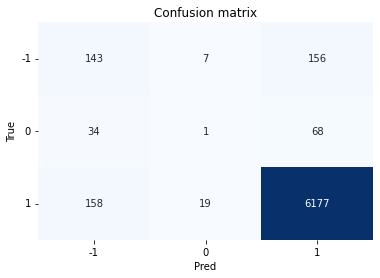

In [175]:
from sklearn import metrics
classes = np.unique(y_testbow)
cm0 = metrics.confusion_matrix(y_testbow, pred_test)
fig, ax = plt.subplots()
sns.heatmap(cm0, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

# Multinomial on TFIDF features on balanced data

In [176]:
classifier6 = MultinomialNB()
classifier6.fit(x_traintfidf1, y_traintfidf1)
pred_test = classifier6.predict(x_testtfidf)
pred_train=classifier6.predict(x_traintfidf1)
accuracy_train6=accuracy_score(y_traintfidf1,pred_train)*100
accuracy_test6 = accuracy_score(y_testtfidf, pred_test) * 100
print('Accuracy of Training data =',accuracy_train6)
print("Accuracy of Test data =", accuracy_test6)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Training data = 94.45398262317258
Accuracy of Test data = 88.15614372319976


In [177]:
print(classification_report(y_testtfidf, pred_test))

              precision    recall  f1-score   support

          -1       0.28      0.75      0.41       306
           0       0.08      0.11      0.09       103
           1       0.98      0.90      0.94      6354

    accuracy                           0.88      6763
   macro avg       0.45      0.59      0.48      6763
weighted avg       0.94      0.88      0.90      6763



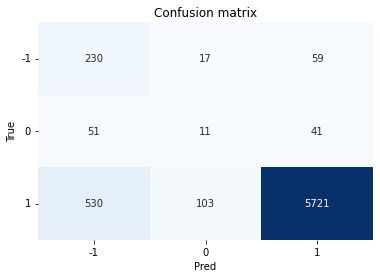

In [178]:
from sklearn import metrics
classes = np.unique(y_testtfidf)
cm0 = metrics.confusion_matrix(y_testtfidf, pred_test)
fig, ax = plt.subplots()
sns.heatmap(cm0, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

# 4.LGBMClassifier(Light Gradient Boosting Machine)

In [179]:
!pip install lightgbm


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [180]:
from lightgbm import LGBMClassifier

# LGBMClassifier on BOW on balanced data

In [181]:
classifier7 = LGBMClassifier()
classifier7.fit(x_trainbow1, y_trainbow1)
pred_test = classifier7.predict(x_testbow)
pred_train=classifier7.predict(x_trainbow1)
accuracy_train7=accuracy_score(y_trainbow1,pred_train)*100
accuracy_test7= accuracy_score(y_testbow, pred_test) * 100
print('Accuracy of Training data =',accuracy_train7)
print("Accuracy of Test data =", accuracy_test7)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Training data = 95.85869621767858
Accuracy of Test data = 94.72127753955345


In [182]:
print(classification_report(y_testbow, pred_test))

              precision    recall  f1-score   support

          -1       0.57      0.62      0.59       306
           0       0.13      0.10      0.11       103
           1       0.98      0.98      0.98      6354

    accuracy                           0.95      6763
   macro avg       0.56      0.56      0.56      6763
weighted avg       0.95      0.95      0.95      6763



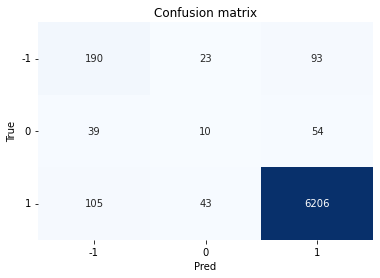

In [183]:
from sklearn import metrics
classes = np.unique(y_testbow)
cm0 = metrics.confusion_matrix(y_testbow, pred_test)
fig, ax = plt.subplots()
sns.heatmap(cm0, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

# LGBMClassifier on TFIDF on balanced data

In [184]:
classifier8 = LGBMClassifier()
classifier8.fit(x_traintfidf1, y_traintfidf1)
pred_test = classifier8.predict(x_testtfidf)
pred_train=classifier8.predict(x_traintfidf1)
accuracy_train8=accuracy_score(y_traintfidf1,pred_train)*100
accuracy_test8 = accuracy_score(y_testtfidf, pred_test) * 100
print('Accuracy of Training data =',accuracy_train8)
print("Accuracy of Test data =", accuracy_test8)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Training data = 99.97658810675823
Accuracy of Test data = 95.40144906106758


In [185]:
print(classification_report(y_testtfidf, pred_test))

              precision    recall  f1-score   support

          -1       0.60      0.67      0.64       306
           0       0.32      0.20      0.25       103
           1       0.98      0.98      0.98      6354

    accuracy                           0.95      6763
   macro avg       0.63      0.62      0.62      6763
weighted avg       0.95      0.95      0.95      6763



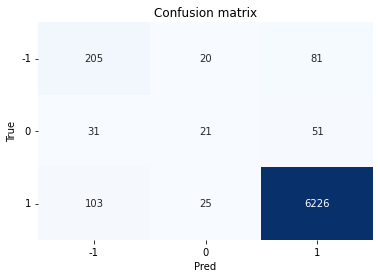

In [186]:
from sklearn import metrics
classes = np.unique(y_testtfidf)
cm0 = metrics.confusion_matrix(y_testtfidf, pred_test)
fig, ax = plt.subplots()
sns.heatmap(cm0, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

# 5.XGBMClassifier(Extra Gradient Boosting Machine)

In [187]:
import xgboost

In [188]:
from xgboost import XGBClassifier

# XGBMClassifier on BOW on balanced data

In [189]:
classifier9 = XGBClassifier()
classifier9.fit(x_trainbow1, y_trainbow1)
pred_test = classifier9.predict(x_testbow)
pred_train=classifier9.predict(x_trainbow1)
accuracy_train9=accuracy_score(y_trainbow1,pred_train)*100
accuracy_test9= accuracy_score(y_testbow, pred_test) * 100
print('Accuracy of Training data =',accuracy_train9)
print("Accuracy of Test data =", accuracy_test9)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[20:34:09] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of Training data = 95.26039227927787
Accuracy of Test data = 94.76563655182612


In [190]:
print(classification_report(y_testbow, pred_test))

              precision    recall  f1-score   support

          -1       0.58      0.58      0.58       306
           0       0.21      0.16      0.18       103
           1       0.97      0.98      0.98      6354

    accuracy                           0.95      6763
   macro avg       0.59      0.57      0.58      6763
weighted avg       0.94      0.95      0.95      6763



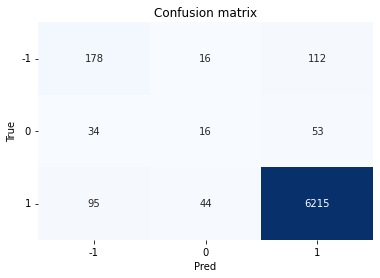

In [191]:
from sklearn import metrics
classes = np.unique(y_testbow)
cm0 = metrics.confusion_matrix(y_testbow, pred_test)
fig, ax = plt.subplots()
sns.heatmap(cm0, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

# XGBMClassifier on TFIDF on balanced data

In [192]:
classifier10 = XGBClassifier()
classifier10.fit(x_traintfidf1, y_traintfidf1)
pred_test = classifier10.predict(x_testtfidf)
pred_train=classifier10.predict(x_traintfidf1)
accuracy_train10=accuracy_score(y_traintfidf1,pred_train)*100
accuracy_test10 = accuracy_score(y_testtfidf, pred_test) * 100
print('Accuracy of Training data =',accuracy_train10)
print("Accuracy of Test data =", accuracy_test10)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[20:42:23] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of Training data = 99.94537224910255
Accuracy of Test data = 95.431021735916


In [193]:
print(classification_report(y_testtfidf, pred_test))

              precision    recall  f1-score   support

          -1       0.63      0.64      0.64       306
           0       0.22      0.16      0.18       103
           1       0.98      0.98      0.98      6354

    accuracy                           0.95      6763
   macro avg       0.61      0.59      0.60      6763
weighted avg       0.95      0.95      0.95      6763



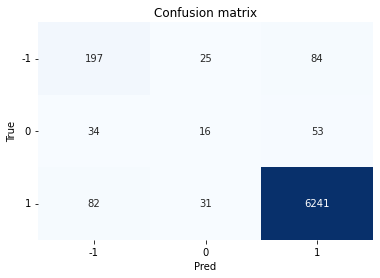

In [194]:
from sklearn import metrics
classes = np.unique(y_testtfidf)
cm0 = metrics.confusion_matrix(y_testtfidf, pred_test)
fig, ax = plt.subplots()
sns.heatmap(cm0, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

# 6.AdaBoost

In [195]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost Classifier on BOW on balanced data

In [196]:
classifier11 = AdaBoostClassifier()
classifier11.fit(x_trainbow1, y_trainbow1)
pred_test = classifier11.predict(x_testbow)
pred_train=classifier11.predict(x_trainbow1)
accuracy_train11=accuracy_score(y_trainbow1,pred_train)*100
accuracy_test11= accuracy_score(y_testbow, pred_test) * 100
print('Accuracy of Training data =',accuracy_train11)
print("Accuracy of Test data =", accuracy_test11)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Training data = 74.2443161125852
Accuracy of Test data = 91.3499926068313


In [197]:
print(classification_report(y_testbow, pred_test))

              precision    recall  f1-score   support

          -1       0.41      0.44      0.42       306
           0       0.12      0.34      0.17       103
           1       0.98      0.95      0.96      6354

    accuracy                           0.91      6763
   macro avg       0.50      0.58      0.52      6763
weighted avg       0.94      0.91      0.93      6763



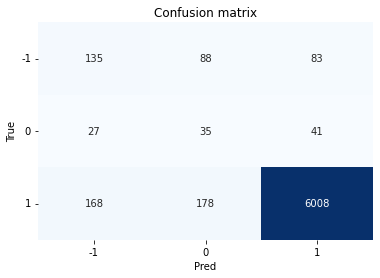

In [198]:
from sklearn import metrics
classes = np.unique(y_testbow)
cm0 = metrics.confusion_matrix(y_testbow, pred_test)
fig, ax = plt.subplots()
sns.heatmap(cm0, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

# AdaBoost Classifier on TFIDF on balanced data

In [199]:
classifier12 = AdaBoostClassifier()
classifier12.fit(x_traintfidf1, y_traintfidf1)
pred_test = classifier12.predict(x_testtfidf)
pred_train=classifier12.predict(x_traintfidf1)
accuracy_train12=accuracy_score(y_traintfidf1,pred_train)*100
accuracy_test12 = accuracy_score(y_testtfidf, pred_test) * 100
print('Accuracy of Training data =',accuracy_train12)
print("Accuracy of Test data =", accuracy_test12)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Training data = 80.87508454294782
Accuracy of Test data = 87.47597220168565


In [200]:
print(classification_report(y_testtfidf, pred_test))

              precision    recall  f1-score   support

          -1       0.46      0.36      0.41       306
           0       0.09      0.62      0.16       103
           1       0.99      0.90      0.94      6354

    accuracy                           0.87      6763
   macro avg       0.51      0.63      0.50      6763
weighted avg       0.95      0.87      0.91      6763



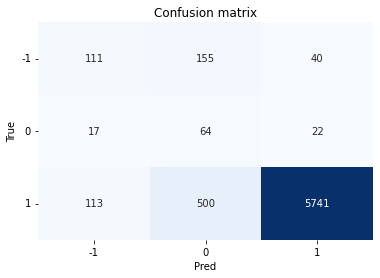

In [201]:
from sklearn import metrics
classes = np.unique(y_testtfidf)
cm0 = metrics.confusion_matrix(y_testtfidf, pred_test)
fig, ax = plt.subplots()
sns.heatmap(cm0, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

# Summary of all the models

In [202]:
AS={'Models':['LinearSVC(BOW)','LinearSVC(TFIDF)','Random Forest(BOW)', 'Random Forest(TFIDF)','Multinomial Naive Bayes(BOW)', 'Multinomial Naive Bayes(TFIDF)','LGBMClassifier(BOW)','LGBMClassifier(TFIDF)','XGBClassifier(BOW)','XGBClassifier(TFIDF)','AdaBoostClassifier(BOW)','AdaBoostClassifier(TFIDF)']
    ,'Test Accuracy':[accuracy_test1,accuracy_test2,accuracy_test3,accuracy_test4,accuracy_test5,accuracy_test6,accuracy_test7,accuracy_test8,accuracy_test9,accuracy_test10,accuracy_test11,accuracy_test12],
    'F1-score':[0.97,0.98,0.97,0.97,0.97,0.94,0.98,0.98,0.98,0.98,0.96,0.94]
    ,'precision':[0.97,0.98,0.96,0.95,0.97,0.98,0.98,0.98,0.97,0.98,0.98,0.99]}

In [203]:
Model_Acc=pd.DataFrame(AS, index =[1,2,3,4,5,6,7,8,9,10,11,12])

In [204]:
Model_Acc

Models  Test Accuracy  F1-score  precision
1                   LinearSVC(BOW)      93.405294      0.97       0.97
2                 LinearSVC(TFIDF)      95.519740      0.98       0.98
3               Random Forest(BOW)      94.336833      0.97       0.96
4             Random Forest(TFIDF)      94.529055      0.97       0.95
5     Multinomial Naive Bayes(BOW)      93.464439      0.97       0.97
6   Multinomial Naive Bayes(TFIDF)      88.156144      0.94       0.98
7              LGBMClassifier(BOW)      94.721278      0.98       0.98
8            LGBMClassifier(TFIDF)      95.401449      0.98       0.98
9               XGBClassifier(BOW)      94.765637      0.98       0.97
10            XGBClassifier(TFIDF)      95.431022      0.98       0.98
11         AdaBoostClassifier(BOW)      91.349993      0.96       0.98
12       AdaBoostClassifier(TFIDF)      87.475972      0.94       0.99

In [205]:
Model_Acc.sort_values(by='Test Accuracy',ascending=False)

Models  Test Accuracy  F1-score  precision
2                 LinearSVC(TFIDF)      95.519740      0.98       0.98
10            XGBClassifier(TFIDF)      95.431022      0.98       0.98
8            LGBMClassifier(TFIDF)      95.401449      0.98       0.98
9               XGBClassifier(BOW)      94.765637      0.98       0.97
7              LGBMClassifier(BOW)      94.721278      0.98       0.98
4             Random Forest(TFIDF)      94.529055      0.97       0.95
3               Random Forest(BOW)      94.336833      0.97       0.96
5     Multinomial Naive Bayes(BOW)      93.464439      0.97       0.97
1                   LinearSVC(BOW)      93.405294      0.97       0.97
11         AdaBoostClassifier(BOW)      91.349993      0.96       0.98
6   Multinomial Naive Bayes(TFIDF)      88.156144      0.94       0.98
12       AdaBoostClassifier(TFIDF)      87.475972      0.94       0.99

# we are getting both Higher accuracy,high F1 score and precision for the LGBM Classifier (TFIDF).So,we will use this model for prediction

# prediction

In [206]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet=WordNetLemmatizer()
cv = CountVectorizer()

In [207]:
!pip install rake-nltk


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [208]:
from rake_nltk import Rake
#rapid automatic keyword extract

In [209]:
def clean_text(a):
    print("Number of words in Review:", len(a.split()))
    text=re.sub('[^A-za-z0-9]',' ',a)
    text=text.lower()
    text=text.split(' ')
    text = [wordnet.lemmatize(word) for word in text if word not in (stopwords.words('english'))]
    text = ' '.join(text)
    top2_words = get_top_n2_words([text],n=5) 
    df = pd.DataFrame(top2_words)
    df.columns=["Bi-gram", "Freq"]
    print(df)
   
    return text

In [210]:
def expression_check(prediction_input):
    if prediction_input == -1:
        print("Input statement has Negative Sentiment.")
    elif prediction_input == 1:
        print("Input statement has Positive Sentiment.")
    else:
        print(" Input statement has Neutral Sentiment.")

In [211]:
# function to take the input statement and perform the same transformations we did earlier
def sentiment_predictor(input):
    input = clean_text(input)
    transformed_input = vectorizer.transform([input])
    prediction = model.predict(transformed_input)
    expression_check(prediction)
    r = Rake(language='english', stopwords=STOPWORDS)
    r.extract_keywords_from_text(input)
    r.get_ranked_phrases()
    print(r.get_ranked_phrases())

In [212]:
a=('Looked a 3 night stay  breakfast was a samples  you had to wait to be called to line up  shouted at by a member of staff in the breakfast room for lining up to soon  chef putting bread in the coaster with bear hands  chef having a mask round his neck  Making one cocktail  enough for one and putting it in two glass   they went back 3 time until we got a full glass  made to feel uncomfortable an unwelcome  ')

In [213]:
sentiment_predictor(a)

Number of words in Review: 80
            Bi-gram  Freq
0      looked night     1
1        night stay     1
2    stay breakfast     1
3  breakfast sample     1
4       sample wait     1
Input statement has Positive Sentiment.
['looked 3 night stay breakfast sample wait called line shouted member staff breakfast room lining soon chef putting bread coaster bear hand chef mask round neck making one cocktail enough one putting two glass went back 3 time got full glass made feel uncomfortable unwelcome']


In [214]:
b=('For the location this wasn t too bad  However  was the smallest hotel room i have ever stayed in  Small double bed up against the wall which was not particularly com  Pairs all over the room including many on the bathroom floor  ended up putting a large towel down on the floor so they stopped staring at me  To make it consistent a very long black hair in the bed once the duet was pulled back  I will find another hotel next time  Poor welcome very robotic but a hotel of this size and busy will just chun guests in and out  Lucky we only stayed one night ')

In [215]:
sentiment_predictor(b)

Number of words in Review: 108
            Bi-gram  Freq
0      location bad     1
1       bad however     1
2  however smallest     1
3    smallest hotel     1
4        hotel room     1
Input statement has Negative Sentiment.
['pair room including many bathroom floor ended putting large towel floor stopped staring make consistent long black hair bed duet pulled back find another hotel next time poor welcome robotic hotel size busy chun guest lucky stayed one night', 'stayed small double bed wall particularly', 'smallest hotel room', 'location bad']


# Saving the trained model

In [216]:
import pickle
from pickle import load

In [217]:
pickle_out=open('model.pkl','wb')
pickle.dump(model,pickle_out)
pickle_out.close()